In [ ]:
import pandas as pd
import missingno as msno
import os
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, train_test_split, cross_val_score
from sklearn import metrics
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import cm
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pickle

In [ ]:
#retrieve dataset from google drive
urllib.request.urlretrieve('https://drive.google.com/uc?id=1bR-0Pj5kVCCXNIxvxKDl5UsVKe1CElrS&export=download','clean_sofa.csv')

('clean_sofa.csv', <http.client.HTTPMessage at 0x7fb2be004710>)

In [ ]:
#read dataset into pandas
data = pd.read_csv('clean_sofa.csv')
data

,Death,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Respiration_rate,Diastolic,Glasgow_coma_scale,Ventilation,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
0,0,54,1,29.681633,41,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,0.0,0.0,13.0,63.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,3.46,3.0,15
1,0,65,0,18.744796,42,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,17.0,70.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.96,1.0,12
2,0,54,1,21.913580,24,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,10.0,101.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,8.57,1.0,15
3,0,59,1,0.000000,34,110.0,82.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,19.0,56.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,2.70,1.0,23
4,0,50,1,22.446126,65,96.0,70.0,85.0,0.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,3.0,20.0,87.0,15.0,0,1,0,0,0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,4.81,7.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224,1,72,0,32.656250,65,80.0,70.0,97.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,20.0,102.0,15.0,0,0,0,0,1,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0,6.76,3.0,28
9225,1,65,0,25.383707,71,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,3.0,16.0,45.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55,5.0,31
9226,1,66,1,22.305471,180,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,4,2.0,0.0,4.0,4.0,1.0,27.0,55.0,3.0,1,0,0,0,1,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2.30,15.0,49
9227,0,56,1,24.772097,89,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3,0.0,0.0,4.0,0.0,1.0,17.0,62.0,3.0,0,0,0,1,1,0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,21.16,8.0,49


In [ ]:
#to check values of each columns
for column in data:
    print('{} : {}'.format(str(column),data[column].unique()))

Death : [0 1]
Age : [ 54  65  59  50  55  77  66  62  80  74  63  43  61  70  92  67  40  51
  49  69  53  73  57  58  56  81  75  48  60  20  64  86  68  39  76  78
  23  46  52  45  26  42  82  98  71  96  89  90  87  97  79  85  88  99
  47  72  84  91  83  41  93  31  27  36  21  32  22  19  33  37  30  44
  34  29  25  18  35  38  94  95 100  28  24 105 101]
Gender : [1 0]
BMI : [29.68163265 18.74479599 21.91358025 ... 32.23493133 49.61742791
 25.3837072 ]
Apache3_score : [ 41  42  24  34  65  51  19  38  45  60  64  82  36  33  50 137  67  44
  59  32  95  53  37 119  87  79  76  29 106  40 108  58  74  63  35  43
  21  70  62  14  23  47  46  17  48  69  85  72  57  98  61  54  73  86
  78  56  75  90  27  66  31  39  84  49  52  16  77  55  68  71 177  15
  20  28  26  25  81  83  12  30  22  18 114  92  88  93  96  91  10 135
  80 109  11  89 105 107 132  99  97 103 134 101 136 112 110 115 158 102
  94 127 139 111 104 141 100 117 126 133 145 125 194 157 113 155 138 142
 130 14

In [ ]:
# all binary datas
binary_data = data[['Gender','Myocardial_infarction','Congestive_heart_failure','Cerebro_vascular_accident','Diabetes_mellitus','Prior_cancer','Prior_lung_disease','Ventilation','Previous_Dialysis','On_dialysis','On_intra-aortic_balloon_pump','Pre-anesthesia_checkup','Packed_red_blood_cells','Cardiogenic_shock','Cardiomyopathy','Heart_failure','Irregular_heartbeat','Cardiac_arrest','Acute_coronary_syndrome','Coronary_artery_disease','Angiogram_hospital_stay','Coronary_stent']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2bdad3c50>,
      dtype=object)

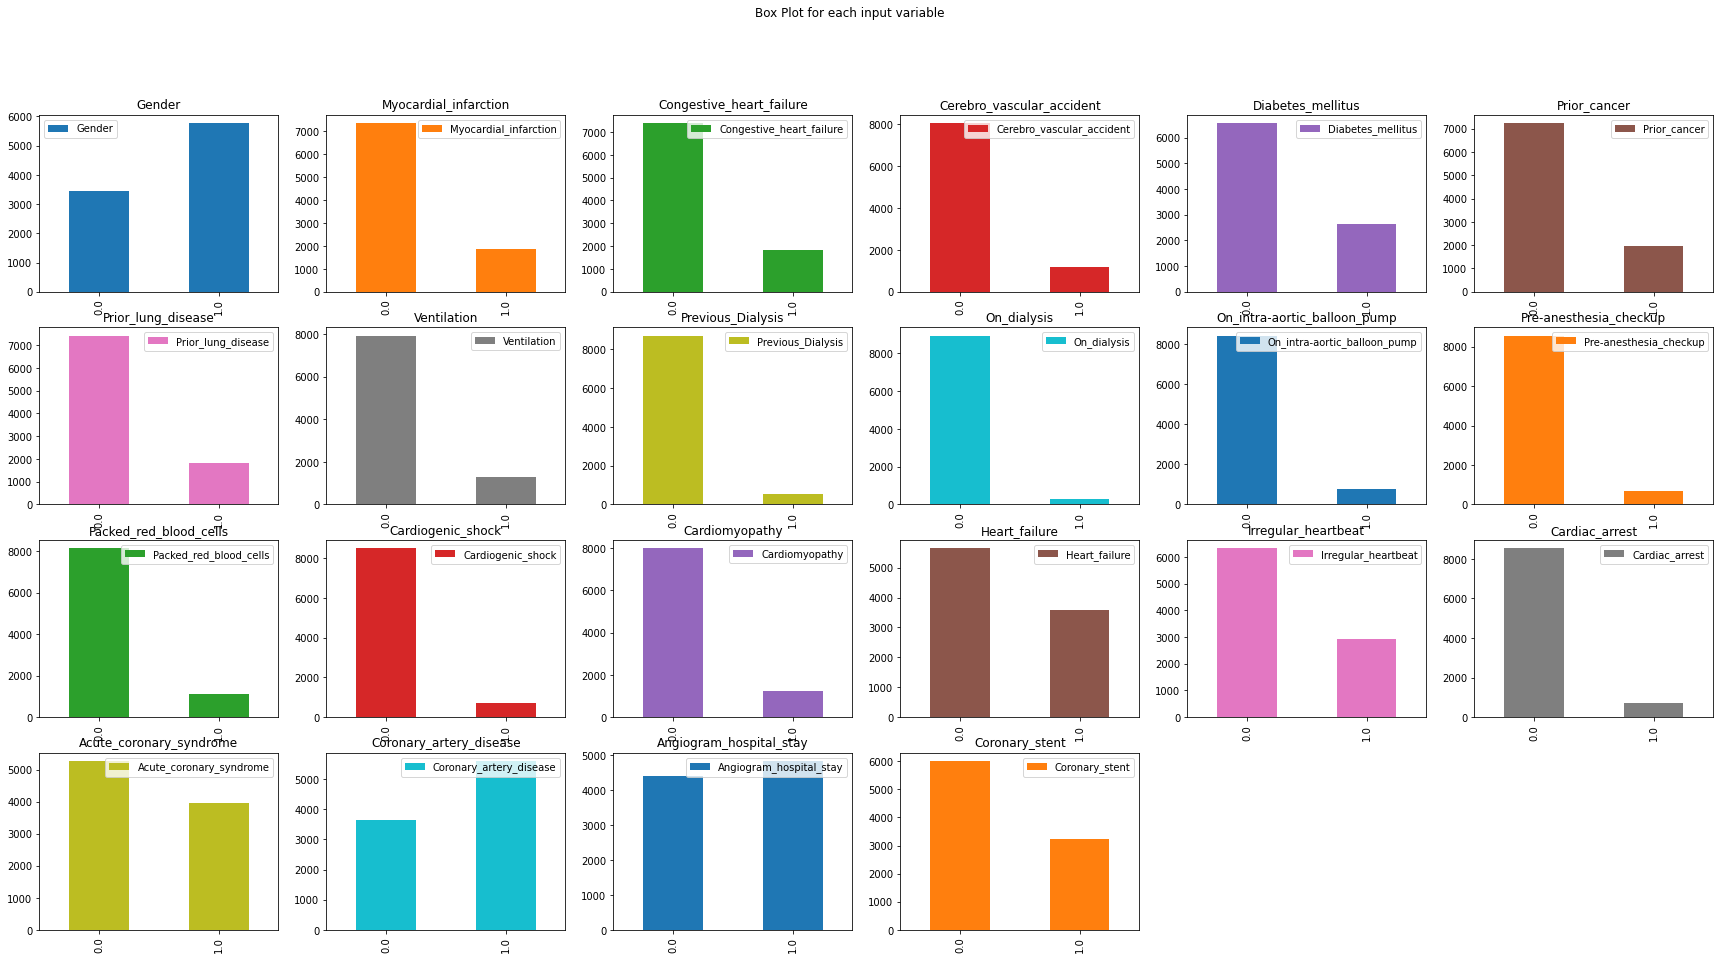

In [ ]:
#bar charts for all binary data
binary_data.apply(pd.Series.value_counts).plot(kind='bar', subplots=True, layout=(4,6), sharex=False, sharey=False, figsize=(30,15), title='Box Plot for each input variable')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


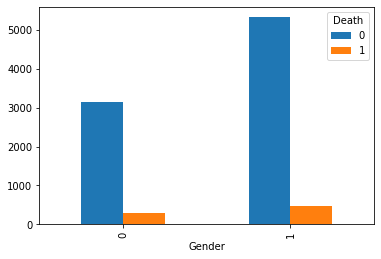

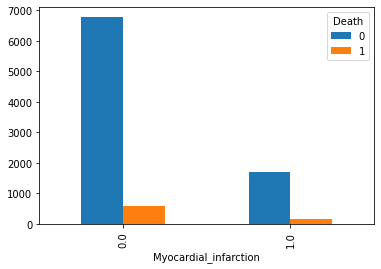

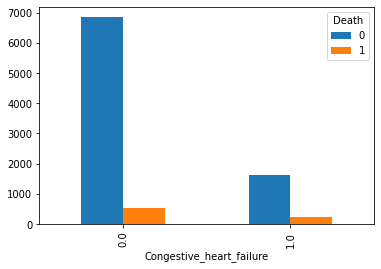

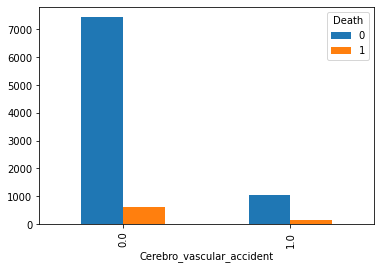

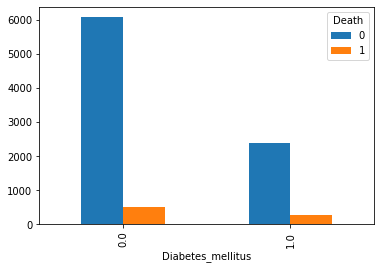

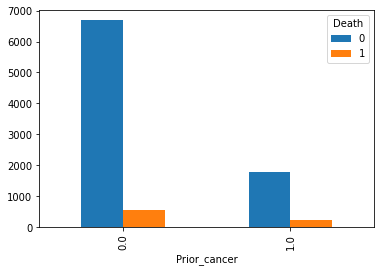

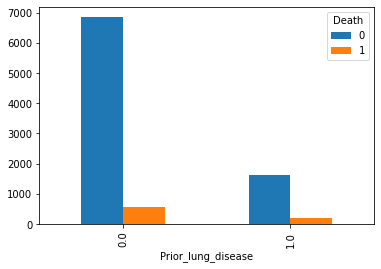

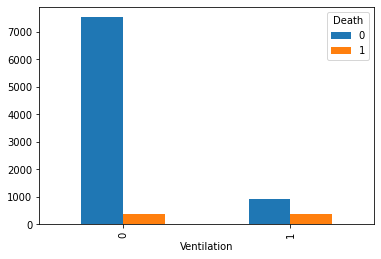

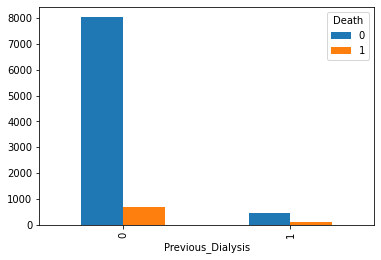

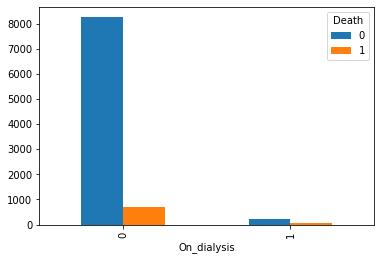

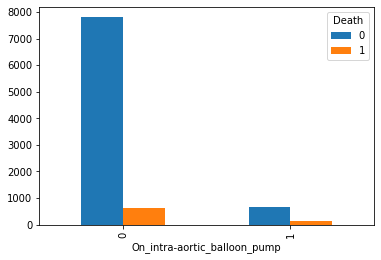

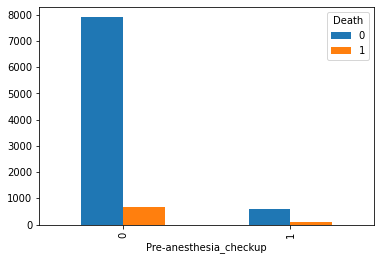

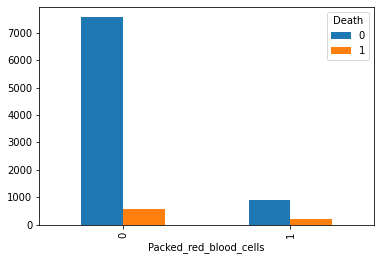

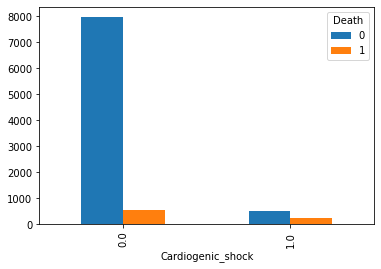

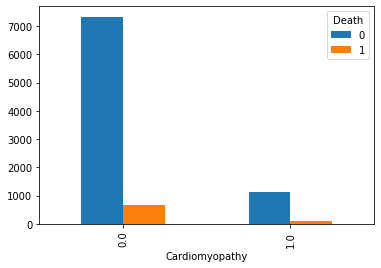

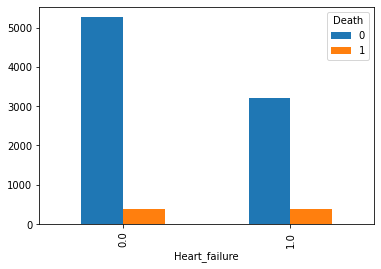

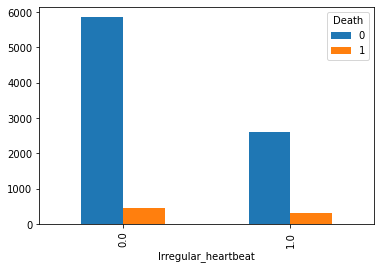

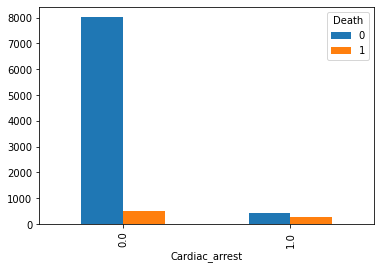

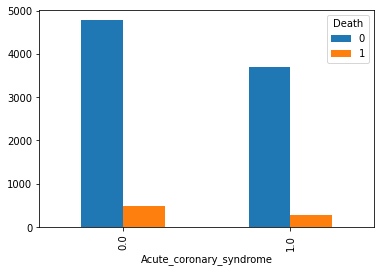

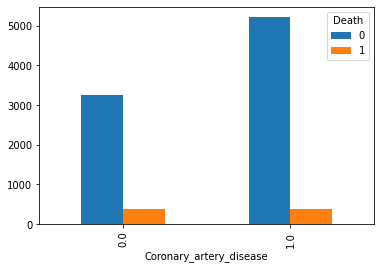

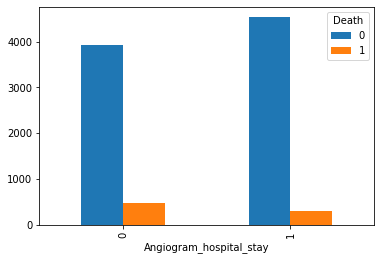

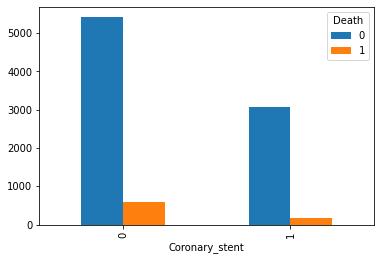

In [ ]:
# relation between 'Death' and other binary columns
for column in binary_data:
  pd.crosstab(data[column],data['Death']).plot(kind='bar')

In [ ]:
# all numeric columns
numeric_data = data[['Age','BMI','Blood_presure','Heart_rate','Oxygen_saturation','Respiration_rate','Diastolic','Apache3_score','OASIS_score']]
numeric_data.describe()

,Age,BMI,Blood_presure,Heart_rate,Oxygen_saturation,Respiration_rate,Diastolic,Apache3_score,OASIS_score
count,9229.000000,9229.000000,9229.000000,9229.00000,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000
mean,67.549247,29.548125,123.314660,81.94008,95.807888,18.448499,69.393976,61.501571,25.709178
std,15.231535,7.077341,26.215911,23.31713,5.739263,5.747799,16.892029,25.123741,10.340829
min,18.000000,0.000000,50.000000,21.00000,2.000000,5.000000,21.000000,10.000000,4.000000
25%,58.000000,24.954731,105.000000,67.00000,94.000000,15.000000,58.000000,44.000000,18.000000
50%,69.000000,28.437500,121.000000,79.00000,97.000000,18.000000,68.000000,58.000000,24.000000
75%,79.000000,33.067867,140.000000,94.00000,99.000000,21.000000,79.000000,74.000000,31.000000
max,105.000000,75.311634,249.000000,283.00000,100.000000,69.000000,148.000000,200.000000,65.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2ba893510>,
      dtype=object)

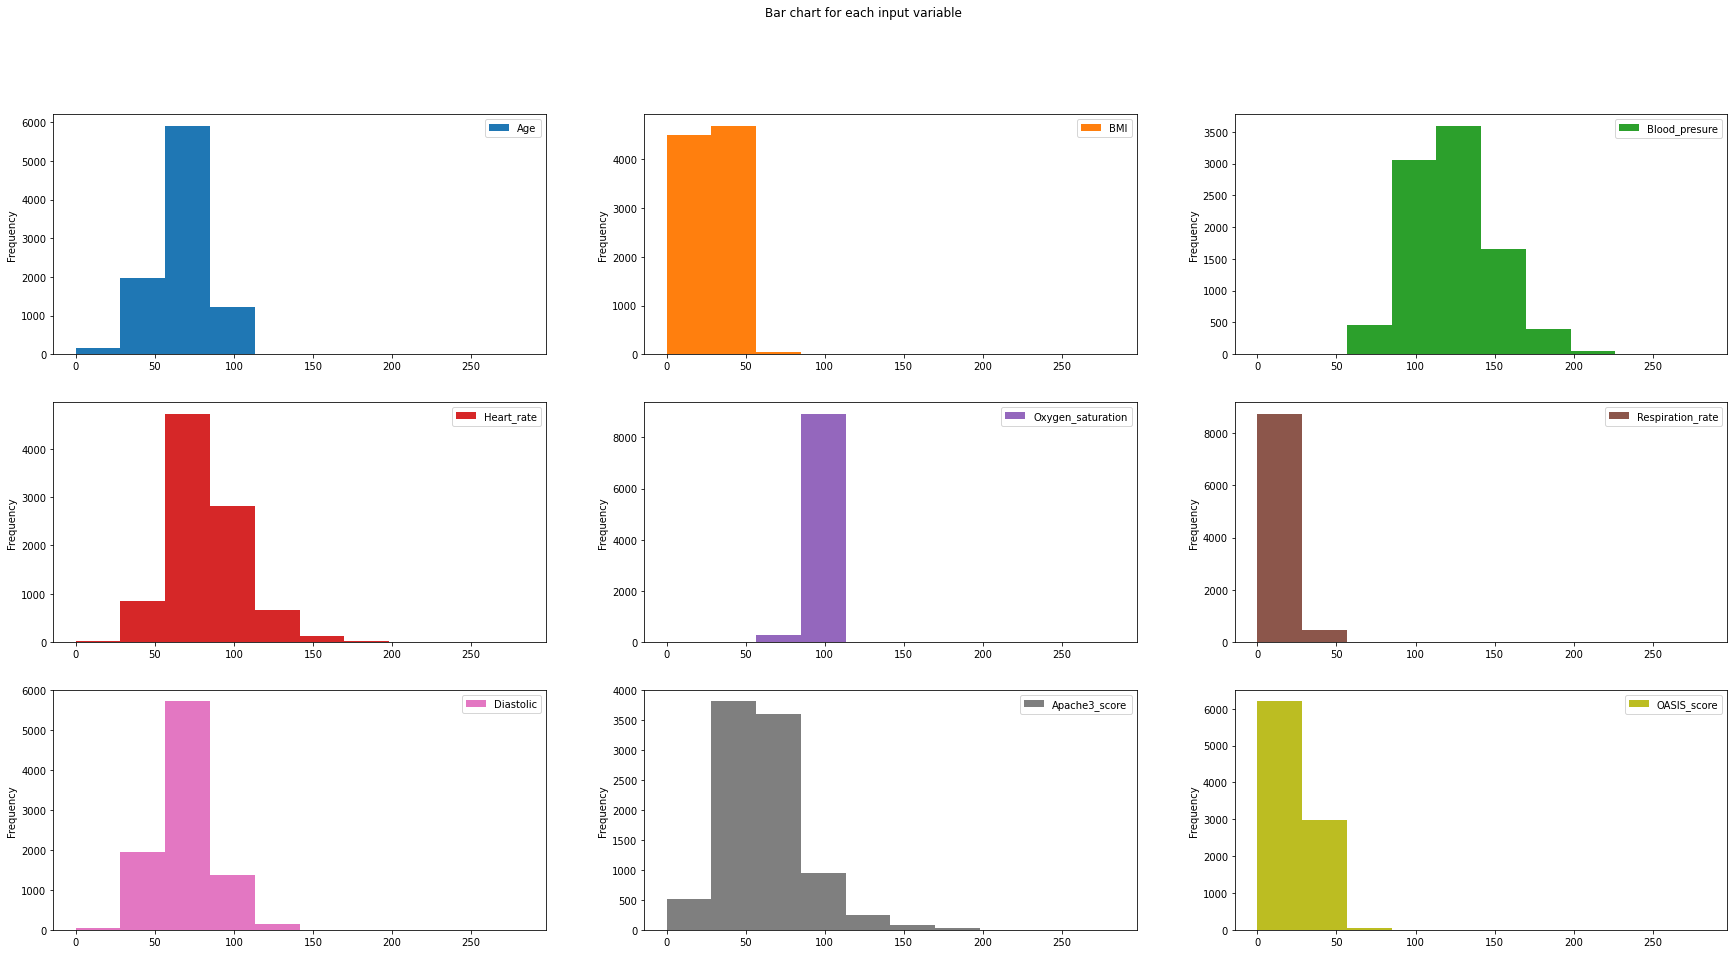

In [ ]:
# plotting histograms for numeric columns
numeric_data.plot(kind='hist', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(30,15), title='Bar chart for each input variable')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2b9a845d0>,
      dtype=object)

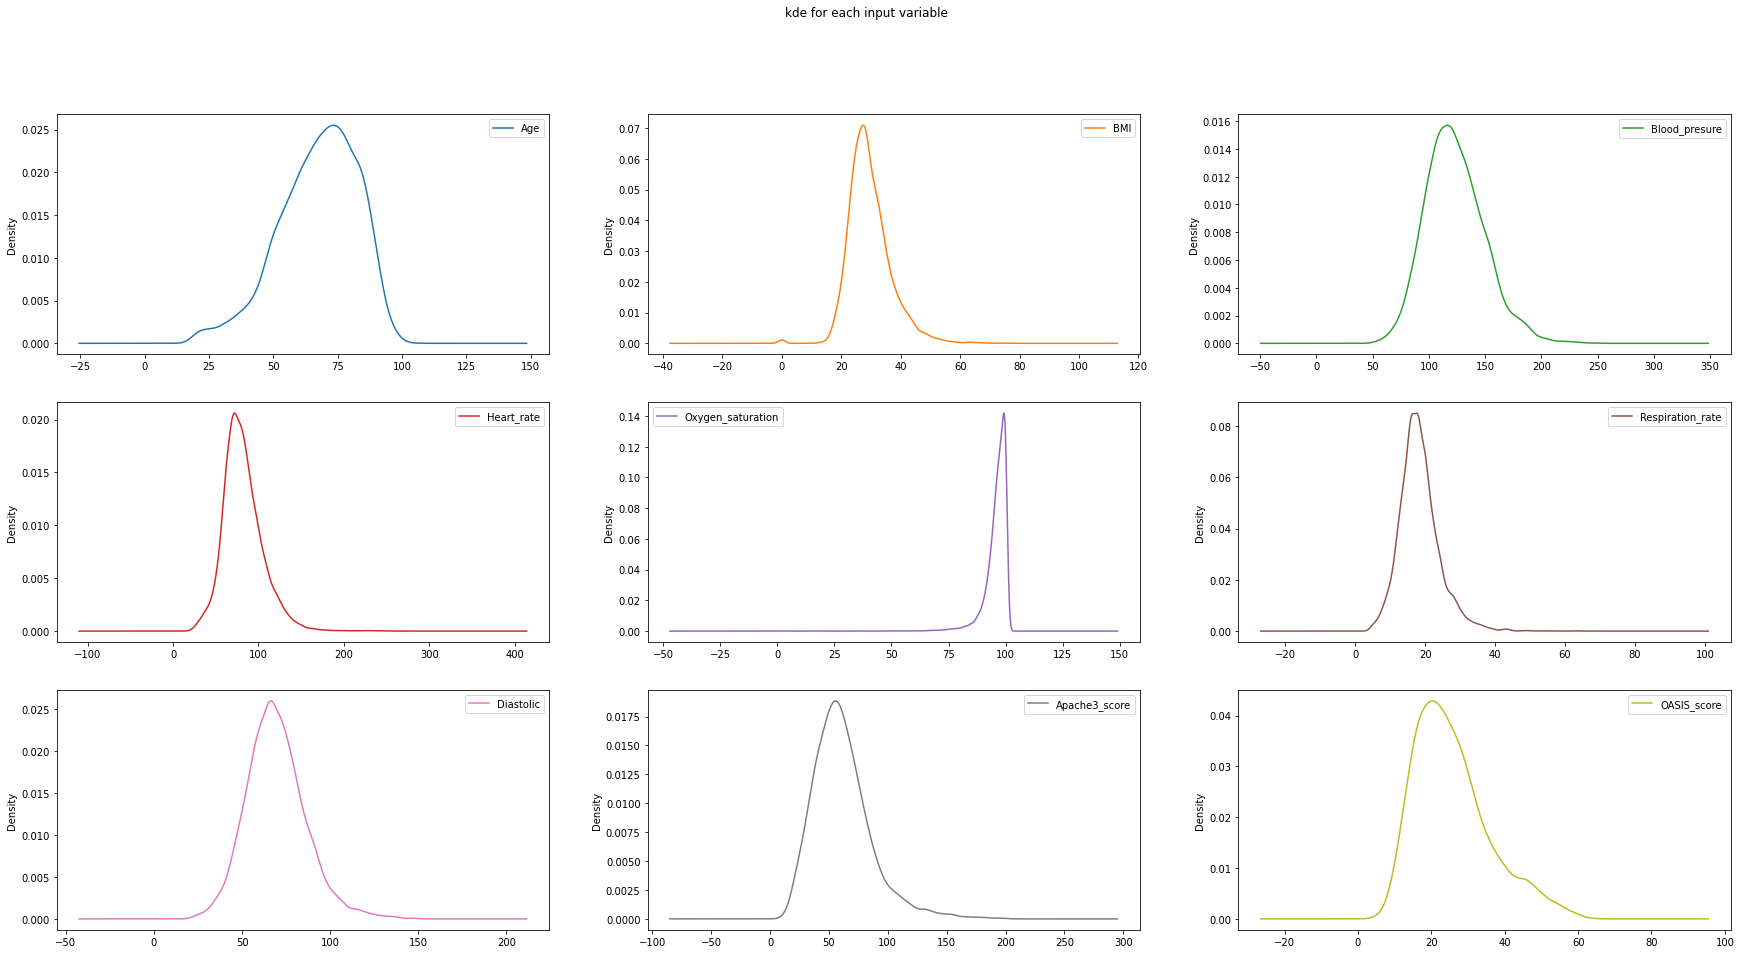

In [ ]:
#plotting kde for all numeric columns
numeric_data.plot(kind='kde', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(30,15), title='kde for each input variable')

In [ ]:
#checking BMI if it has any zero values
numeric_data[numeric_data['BMI'] == 0]

,Age,BMI,Blood_presure,Heart_rate,Oxygen_saturation,Respiration_rate,Diastolic,Apache3_score,OASIS_score
3,59,0.0,110.0,82.0,99.0,19.0,56.0,34,23
73,62,0.0,149.0,70.0,99.0,16.0,72.0,46,15
149,39,0.0,118.0,81.0,98.0,17.0,79.0,16,8
376,26,0.0,111.0,135.0,99.0,27.0,64.0,40,25
386,39,0.0,126.0,63.0,100.0,9.0,77.0,34,8
540,63,0.0,144.0,83.0,100.0,9.0,86.0,28,13
1154,75,0.0,111.0,95.0,96.0,15.0,75.0,46,27
1173,47,0.0,148.0,101.0,88.0,25.0,90.0,67,21
1272,64,0.0,138.0,59.0,99.0,20.0,57.0,53,32
1944,56,0.0,129.0,146.0,95.0,20.0,79.0,46,28


In [ ]:
#dropping data with BMI 0
data = data.drop(data[data['BMI'] == 0].index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2b74d9450>,
      dtype=object)

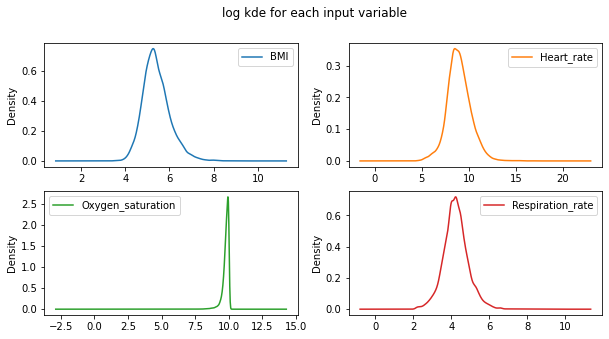

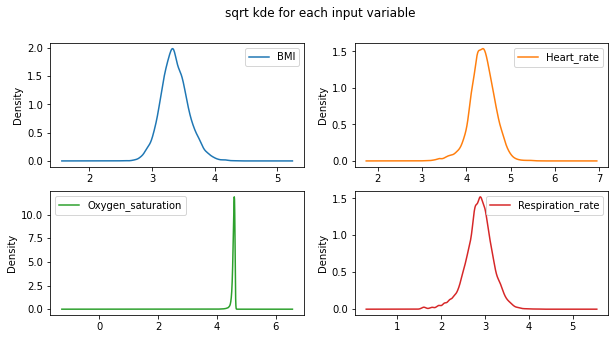

In [ ]:
#plotting kde after applying sqrt function
np.sqrt((data[['BMI','Heart_rate','Oxygen_saturation','Respiration_rate']])).plot(kind='kde', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,5), title='log kde for each input variable')

#plotting kde after applying log function
np.log((data[['BMI','Heart_rate','Oxygen_saturation','Respiration_rate']])).plot(kind='kde', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,5), title='sqrt kde for each input variable')

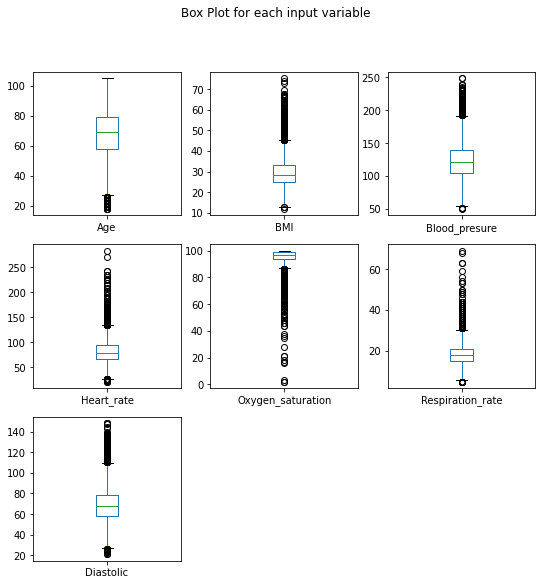

In [ ]:
#plotting box plot
data[['Age','BMI','Blood_presure','Heart_rate','Oxygen_saturation','Respiration_rate','Diastolic']].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('SOFA_box')
plt.show()


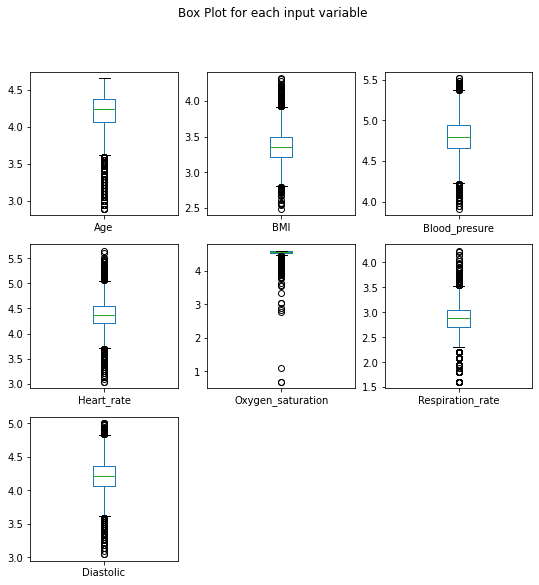

In [ ]:
data[['Age','BMI','Blood_presure','Heart_rate','Oxygen_saturation','Respiration_rate','Diastolic']].apply(lambda x:np.log(x)).plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('SOFA_box')
plt.show()


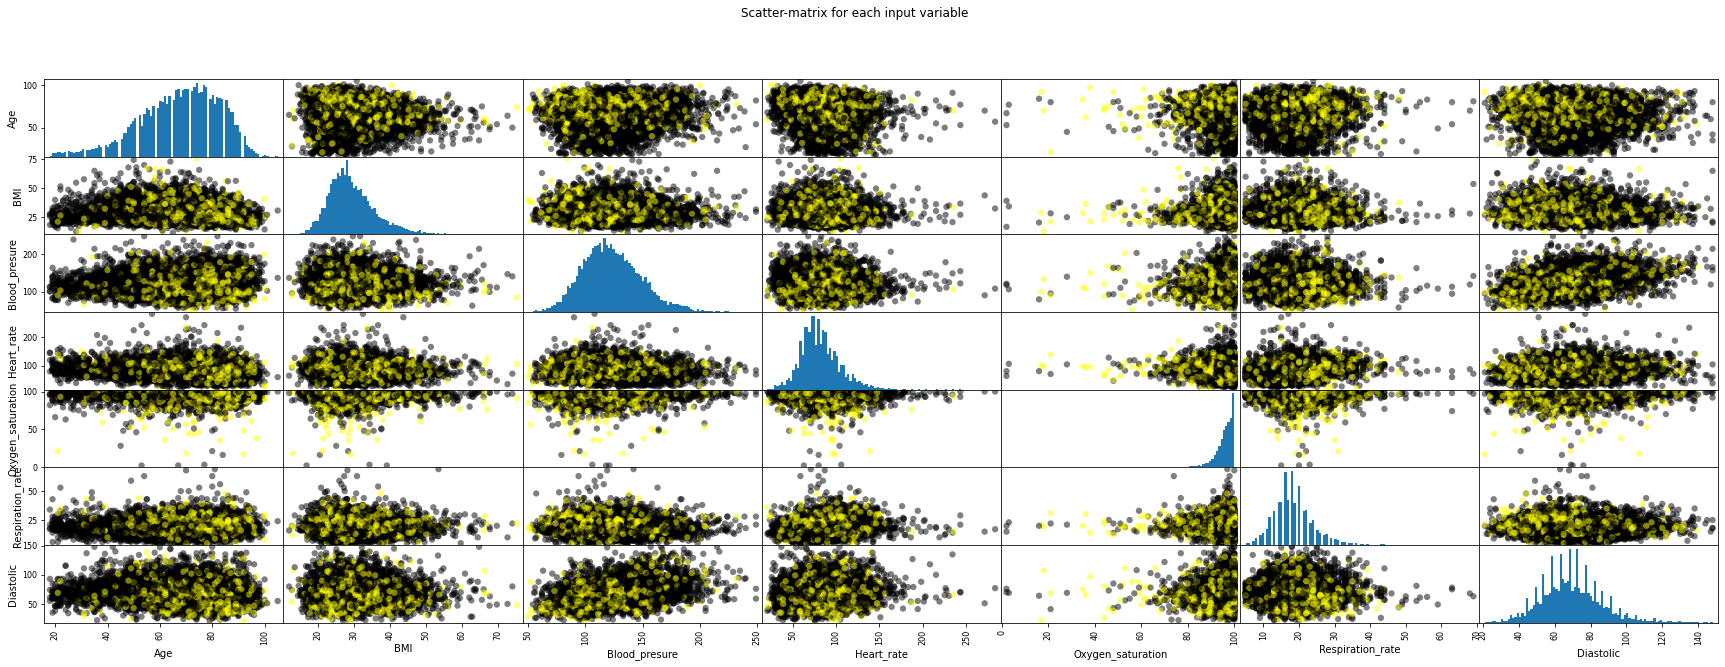

In [ ]:
#scatter plot to find relation bbetween each numerical columns
feature_names = ['Age','BMI','Blood_presure','Heart_rate','Oxygen_saturation','Respiration_rate','Diastolic']
X = data[feature_names]
y = data['Death']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':100}, figsize=(30,10), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('scatter_matrix')

Logistic Regression


In [ ]:
def CalculateMetricsLogisticRegression(dataset):
    target='Death'
    X = dataset.drop([target,'days'],axis=1)
    Y = dataset[target]
    X,Y = shuffle(X,Y)
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=12)

    logistic_regression = LogisticRegression(max_iter=2000)
    logistic_regression.fit(X_train,Y_train)
    Y_pred_logistic = logistic_regression.predict(X_test)
    Y_pred_logistic.reshape(len(Y_pred_logistic))


    Y_pred_logistic_prob=logistic_regression.decision_function(X_test)
    Y_pred_logistic_prob.reshape(len(Y_pred_logistic_prob))



    confusion_matrix = pd.crosstab(Y_test, Y_pred_logistic, rownames=['Actual Values'], colnames=['Predicted Values'])
    sb.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.show()

    print('Precision: ',metrics.precision_score(Y_test, Y_pred_logistic))
    print('Recall: ',metrics.recall_score(Y_test, Y_pred_logistic))
    print('F1-score: ',metrics.f1_score(Y_test, Y_pred_logistic))

    fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(Y_test, Y_pred_logistic_prob)
    auc_logistic = auc(fpr_logistic, tpr_logistic)
    
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (area = {:.3f})'.format(auc_logistic))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

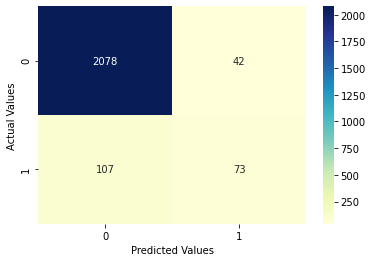

Precision:  0.6347826086956522
Recall:  0.40555555555555556
F1-score:  0.4949152542372882


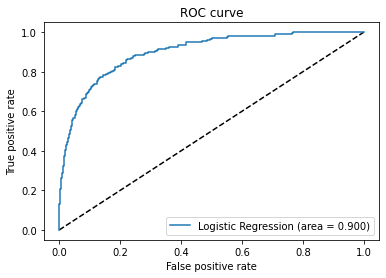

In [ ]:
CalculateMetricsLogisticRegression(data)

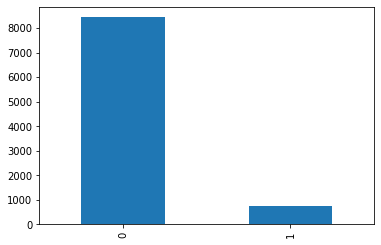

In [ ]:
#unbalanced data
data.Death.value_counts().plot(kind='bar')

Over Sampling

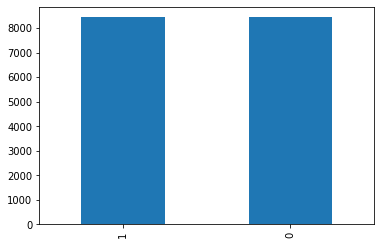

In [ ]:
#oversampling the data
patients_majority = data[data.Death==0]
patients_minority = data[data.Death==1]
patients_majority_length = len(patients_majority)

patients_sample = resample(patients_minority, 
                                 replace=True,     # sample without replacement
                                 n_samples=patients_majority_length,    # to match majority class
                                 random_state=123)
                                 

data_oversampled = pd.concat([patients_majority, patients_sample])
data_oversampled.Death.value_counts().plot(kind='bar')

In [ ]:
data_oversampled

,Death,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Respiration_rate,Diastolic,Glasgow_coma_scale,Ventilation,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
0,0,54,1,29.681633,41,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,0.0,0.0,13.0,63.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,3.46,3.0,15
1,0,65,0,18.744796,42,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,17.0,70.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.96,1.0,12
2,0,54,1,21.913580,24,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,10.0,101.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,8.57,1.0,15
4,0,50,1,22.446126,65,96.0,70.0,85.0,0.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,3.0,20.0,87.0,15.0,0,1,0,0,0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,4.81,7.0,31
5,0,55,1,30.267643,41,166.0,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,22.0,54.0,3.0,1,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,5.67,6.0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,1,47,1,31.994156,104,83.0,120.0,85.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4,2.0,0.0,3.0,0.0,1.0,14.0,59.0,3.0,1,1,0,0,1,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,59.05,14.0,48
2917,1,85,1,27.559184,79,128.0,60.0,100.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2,1.0,0.0,2.0,0.0,1.0,16.0,79.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1,0.73,6.0,33
8622,1,85,0,32.764004,141,103.0,35.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,4.0,4.0,0.0,11.0,61.0,3.0,1,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.08,11.0,44
8800,1,79,0,26.367932,152,112.0,66.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1.0,4.0,0.0,1.0,24.0,67.0,3.0,1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,11.03,13.0,54


# Logistic Regression after Over Sampling

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


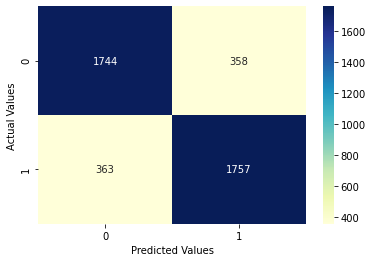

Precision:  0.8307328605200945
Recall:  0.8287735849056603
F1-score:  0.8297520661157024


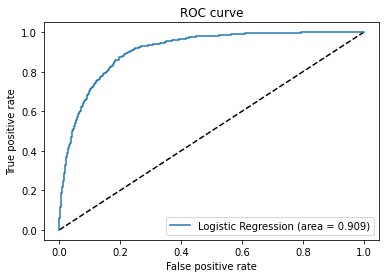

In [ ]:
CalculateMetricsLogisticRegression(data_oversampled)

# Under SAMPLING

In [ ]:
data['Death'].value_counts()

0    8443
1     757
Name: Death, dtype: int64

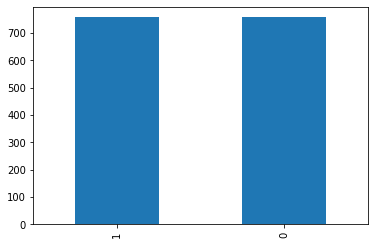

In [ ]:
patients_majority = data[data.Death==0]
patients_minority = data[data.Death==1]
patients_minority_length = len(patients_minority)

patients_sample = resample(patients_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=patients_minority_length,    # to match majority class
                                 random_state=123)
                                 

data_undersampled = pd.concat([patients_minority, patients_sample])
data_undersampled.Death.value_counts().plot(kind='bar')

In [ ]:
data_undersampled

,Death,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Respiration_rate,Diastolic,Glasgow_coma_scale,Ventilation,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
84,1,68,1,30.393890,72,108.0,67.0,93.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,2,0.0,2.0,1.0,0.0,3.0,29.0,59.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.53,8.0,16
101,1,87,0,27.813945,50,110.0,82.0,99.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,1.0,0,0.0,0.0,1.0,1.0,0.0,26.0,73.0,14.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,7.19,2.0,19
123,1,80,1,29.531111,84,145.0,60.0,97.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0,3.0,15.0,50.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,22.21,4.0,36
178,1,93,1,29.860551,177,59.0,39.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,4.0,4.0,4.0,12.0,52.0,3.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.43,16.0,51
366,1,32,0,24.943311,85,138.0,117.0,95.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,3.0,43.0,62.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.67,6.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,0,68,1,32.991690,50,124.0,80.0,97.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,17.0,66.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0,10.51,1.0,17
5091,0,62,1,28.470006,74,114.0,61.0,96.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,1.0,19.0,56.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0,0,1.66,3.0,28
5992,0,80,0,28.481013,95,156.0,57.0,93.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0,0.0,0.0,1.0,1.0,3.0,18.0,46.0,14.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,2.97,5.0,38
4034,0,79,0,34.119031,56,155.0,99.0,96.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,15.0,85.0,15.0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,9.98,4.0,23


# Logistic Regression after Under Sampling

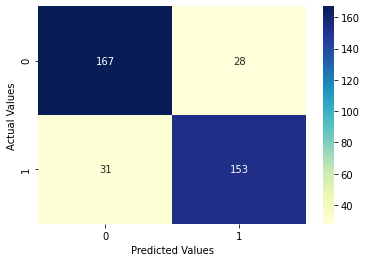

Precision:  0.8453038674033149
Recall:  0.8315217391304348
F1-score:  0.8383561643835616


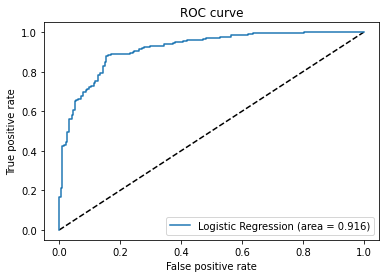

In [ ]:
CalculateMetricsLogisticRegression(data_undersampled)

# Under and Over SAMPLING combination

In [ ]:
data['Death'].value_counts()

0    8443
1     757
Name: Death, dtype: int64

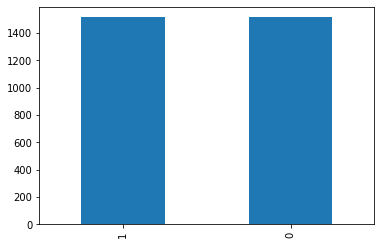

In [ ]:
patients_majority = data[data.Death==0]
patients_minority = data[data.Death==1]
patients_minority_length = len(patients_minority)
patients_majority_length = len(patients_majority)


patients_minority = resample(patients_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=patients_minority_length * 2,    # to match majority class
                                 random_state=123)
                                 
patients_majority = resample(patients_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=patients_minority_length * 2,    # to match majority class
                                 random_state=123)
                                 
data_mixedsampled = pd.concat([patients_minority, patients_majority])
data_mixedsampled.Death.value_counts().plot(kind='bar')

In [ ]:
data_mixedsampled

,Death,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Respiration_rate,Diastolic,Glasgow_coma_scale,Ventilation,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
8329,1,47,0,32.960761,81,110.0,118.0,85.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4,1.0,0.0,1.0,1.0,1.0,30.0,45.0,14.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.85,8.0,48
7439,1,55,1,39.005208,162,94.0,82.0,92.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4,0.0,0.0,4.0,4.0,4.0,18.0,73.0,3.0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.33,16.0,41
7612,1,70,0,28.476562,84,132.0,120.0,80.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3,2.0,0.0,3.0,0.0,0.0,22.0,61.0,15.0,0,0,1,0,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,22.82,8.0,31
7063,1,62,0,24.977778,82,166.0,84.0,100.0,0.0,1.0,0.0,2.0,5.0,0.0,1.0,0.0,0,0.0,0.0,1.0,3.0,1.0,17.0,61.0,8.0,1,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1,0,11.51,5.0,24
4106,1,66,1,33.126014,46,139.0,70.0,94.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1.0,0.0,1.0,0.0,0.0,18.0,77.0,15.0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,24.07,8.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,0,70,0,41.816406,67,139.0,61.0,96.0,1.0,0.0,0.0,0.0,13.0,1.0,1.0,0.0,0,0.0,0.0,1.0,0.0,0.0,22.0,43.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,3.67,1.0,23
3043,0,67,1,32.479315,47,113.0,72.0,97.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0,0.0,17.0,80.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,4.83,2.0,17
1107,0,64,1,29.355102,51,105.0,73.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,3.0,20.0,67.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,1,2.95,4.0,23
8657,0,85,1,20.833333,97,145.0,73.0,72.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0,1.0,0.0,2.0,2.0,3.0,28.0,65.0,14.0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0,0,10.74,8.0,47


# Logistic Regression after Mixed Sampling

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


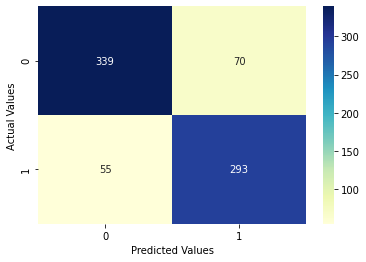

Precision:  0.8071625344352618
Recall:  0.8419540229885057
F1-score:  0.8241912798874825


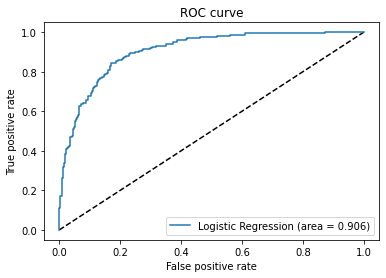

In [ ]:
CalculateMetricsLogisticRegression(data_mixedsampled)

# Export oversampled dataset for classification

In [ ]:
data_oversampled.to_csv('sofa_oversampled_classification.csv', index=False)

# Splitting Data

In [ ]:
#splitting data
target='Death'
X = data_oversampled.drop([target,'days'],axis=1)
Y = data_oversampled[target]
X,Y = shuffle(X,Y)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=12)

In [ ]:
# to store metrics for each models
p_scores = {}
r_scores = {}
f1_scores = {}

# Classification

Logistic Regression

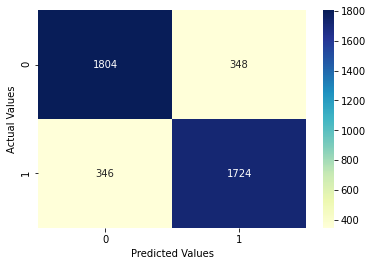

Precision:  0.832046332046332
Recall:  0.8328502415458937
F1-score:  0.8324480927088362


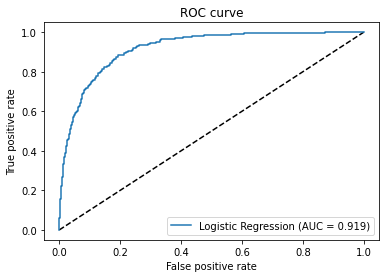

In [ ]:
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train,Y_train)
Y_pred_logistic = logistic_regression.predict(X_test)
Y_pred_logistic_prob = logistic_regression.decision_function(X_test)

confusion_matrix = pd.crosstab(Y_test, Y_pred_logistic, rownames=['Actual Values'], colnames=['Predicted Values'])
sb.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

print('Precision: ',metrics.precision_score(Y_test, Y_pred_logistic))
print('Recall: ',metrics.recall_score(Y_test, Y_pred_logistic))
print('F1-score: ',metrics.f1_score(Y_test, Y_pred_logistic))

fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(Y_test, Y_pred_logistic_prob)
auc_logistic = auc(fpr_logistic, tpr_logistic)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = {:.3f})'.format(auc_logistic))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

p_scores['logistic'] = metrics.precision_score(Y_test, Y_pred_logistic)
r_scores['logistic'] = metrics.recall_score(Y_test, Y_pred_logistic)
f1_scores['logistic'] = metrics.f1_score(Y_test, Y_pred_logistic)

Decision Tree

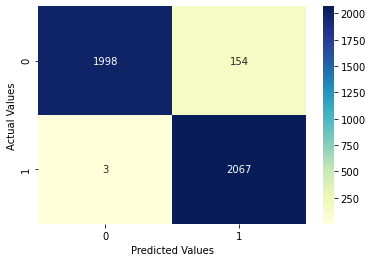

Precision:  0.9306618640252139
Recall:  0.9985507246376811
F1-score:  0.9634117921230483


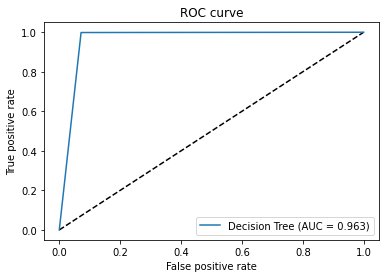

In [ ]:
decisionTree_classifier = DecisionTreeClassifier()
decisionTree_classifier.fit(X_train,Y_train)
Y_pred_decision = decisionTree_classifier.predict(X_test)
Y_pred_decision_prob = decisionTree_classifier.predict_proba(X_test)

confusion_matrix = pd.crosstab(Y_test, Y_pred_decision, rownames=['Actual Values'], colnames=['Predicted Values'])
sb.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

print('Precision: ',metrics.precision_score(Y_test, Y_pred_decision))
print('Recall: ',metrics.recall_score(Y_test, Y_pred_decision))
print('F1-score: ',metrics.f1_score(Y_test, Y_pred_decision))

fpr_decision, tpr_decision, thresholds_decision = roc_curve(Y_test, Y_pred_decision_prob[:,1])
auc_decision = auc(fpr_decision, tpr_decision)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_decision, tpr_decision, label='Decision Tree (AUC = {:.3f})'.format(auc_decision))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

p_scores['decision'] = metrics.precision_score(Y_test, Y_pred_decision)
r_scores['decision'] = metrics.recall_score(Y_test, Y_pred_decision)
f1_scores['decision'] = metrics.f1_score(Y_test, Y_pred_decision)

Random Forest

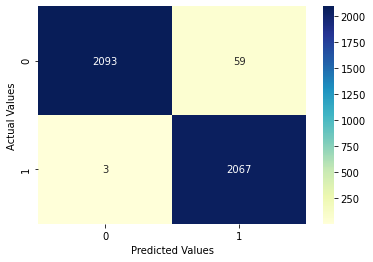

Precision:  0.9722483537158984
Recall:  0.9985507246376811
F1-score:  0.9852240228789322


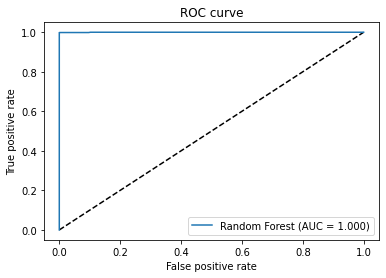

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,Y_train)
Y_pred_forest = random_forest_classifier.predict(X_test)
Y_pred_forest_prob = random_forest_classifier.predict_proba(X_test)

confusion_matrix = pd.crosstab(Y_test, Y_pred_forest, rownames=['Actual Values'], colnames=['Predicted Values'])
sb.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

print('Precision: ',metrics.precision_score(Y_test, Y_pred_forest))
print('Recall: ',metrics.recall_score(Y_test, Y_pred_forest))
print('F1-score: ',metrics.f1_score(Y_test, Y_pred_forest))


fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_test, Y_pred_forest_prob[:,1])
auc_forest = auc(fpr_forest, tpr_forest)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_forest, tpr_forest, label='Random Forest (AUC = {:.3f})'.format(auc_forest))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

p_scores['random'] = metrics.precision_score(Y_test, Y_pred_forest)
r_scores['random'] = metrics.recall_score(Y_test, Y_pred_forest)
f1_scores['random'] = metrics.f1_score(Y_test, Y_pred_forest)

Neural Network

In [ ]:
#defining Model
classification_model = Sequential()
classification_model.add(Dense(50, input_dim=41, activation='relu'))
classification_model.add(Dense(30, activation='relu'))
classification_model.add(Dense(1, activation='sigmoid'))

In [ ]:
classification_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','binary_crossentropy'])

In [ ]:
classification_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                2100      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 3,661
Trainable params: 3,661
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = classification_model.fit(X_train, Y_train, epochs=1000, batch_size=1000)

Epoch 1/1000
13/13 [==============================] - 3s 4ms/step - loss: 1.7676 - accuracy: 0.6007 - binary_crossentropy: 1.7676
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.8495 - accuracy: 0.7168 - binary_crossentropy: 0.8495
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6477 - accuracy: 0.7381 - binary_crossentropy: 0.6477
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.7582 - binary_crossentropy: 0.5725
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5224 - accuracy: 0.7697 - binary_crossentropy: 0.5224
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.7767 - binary_crossentropy: 0.5027
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4664 - accuracy: 0.7921 - binary_crossentropy: 0.4664
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4424 - accurac

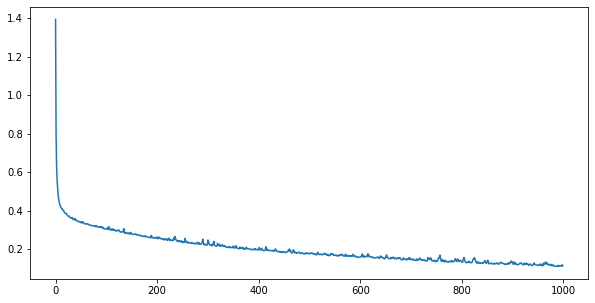

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['binary_crossentropy'])
plt.show()

In [ ]:
#predicting for testing samples
Y_pred_keras = classification_model.predict(X_test)
Y_pred_keras_prob = np.array(Y_pred_keras)

In [ ]:
#converting probabilty to 0 and 1 class at 0.5 threshold value
for i in range(len(Y_pred_keras)):
  if Y_pred_keras[i][0]>0.5:
    Y_pred_keras[i][0] = 1
  else:
    Y_pred_keras[i][0] = 0

In [ ]:
#reshaping predicted values
Y_pred_keras = Y_pred_keras.reshape(len(Y_pred_keras))

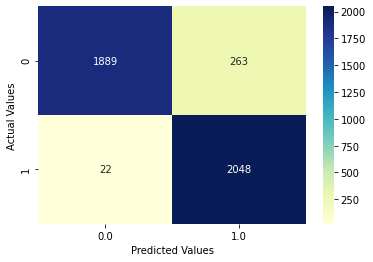

Precision:  0.8861964517524881
Recall:  0.9893719806763285
F1-score:  0.9349463592787034


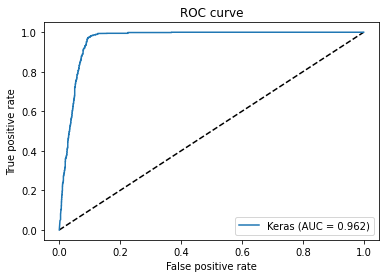

In [ ]:
#creating confusion matrix for test case
confusion_matrix = pd.crosstab(Y_test, Y_pred_keras, rownames=['Actual Values'], colnames=['Predicted Values'])
sb.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
print('Precision: ',metrics.precision_score(Y_test, Y_pred_keras))
print('Recall: ',metrics.recall_score(Y_test, Y_pred_keras))
print('F1-score: ',metrics.f1_score(Y_test, Y_pred_keras))

fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, Y_pred_keras_prob)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (AUC = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

p_scores['neural'] = metrics.precision_score(Y_test, Y_pred_keras)
r_scores['neural'] = metrics.recall_score(Y_test, Y_pred_keras)
f1_scores['neural'] = metrics.f1_score(Y_test, Y_pred_keras)

Comparing ROC Curve of all the models trained

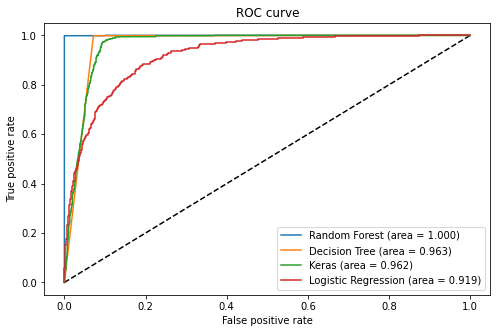

In [ ]:
plt.figure(1,figsize=(8,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_forest, tpr_forest, label='Random Forest (area = {:.3f})'.format(auc_forest))
plt.plot(fpr_decision, tpr_decision, label='Decision Tree (area = {:.3f})'.format(auc_decision))
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (area = {:.3f})'.format(auc_logistic))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

comparing metrics for all classification models

In [ ]:
print('Precision : ',p_scores)
print('Recall : ',r_scores)
print('f1 scores : ',f1_scores)

Precision :  {'logistic': 0.832046332046332, 'decision': 0.9306618640252139, 'random': 0.9722483537158984, 'neural': 0.8861964517524881}
Recall :  {'logistic': 0.8328502415458937, 'decision': 0.9985507246376811, 'random': 0.9985507246376811, 'neural': 0.9893719806763285}
f1 scores :  {'logistic': 0.8324480927088362, 'decision': 0.9634117921230483, 'random': 0.9852240228789322, 'neural': 0.9349463592787034}


In [ ]:
model_names = ['Logistic Regression','Decision Tree','Random Forest','Neural Network']
p_scores_list = [round(p_scores['logistic'],2),round(p_scores['decision'],2),round(p_scores['random'],2),round(p_scores['neural'],2)]
r_scores_list = [round(r_scores['logistic'],2),round(r_scores['decision'],2),round(r_scores['random'],2),round(r_scores['neural'],2)]
f1_scores_list = [round(f1_scores['logistic'],2),round(f1_scores['decision'],2),round(f1_scores['random'],2),round(f1_scores['neural'],2)]

In [ ]:
scores = pd.DataFrame(np.array([model_names, p_scores_list,r_scores_list, f1_scores_list])).transpose().rename(columns={0:'Models',1:'Precision',2:'recall',3:'f1 score'})

In [ ]:
scores

,Models,Precision,recall,f1 score
0,Logistic Regression,0.83,0.83,0.83
1,Decision Tree,0.93,1.0,0.96
2,Random Forest,0.97,1.0,0.99
3,Neural Network,0.89,0.99,0.93


# Applying features from Paper

Logistic Regression

In [ ]:
target='Death'
X = data_oversampled[['OASIS_score','Ventilation','SOFA_score','Cardiac_arrest','Angiogram_hospital_stay','On_dialysis']]
Y = data_oversampled[target]
X,Y = shuffle(X,Y)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=12)

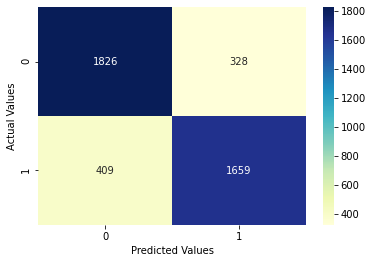

Precision:  0.8349270256668344
Recall:  0.8022243713733076
F1-score:  0.8182490752157832


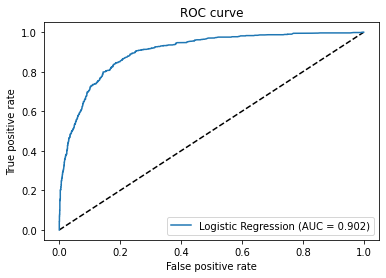

In [ ]:
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train,Y_train)
Y_pred_logistic = logistic_regression.predict(X_test)
Y_pred_logistic_prob = logistic_regression.decision_function(X_test)

confusion_matrix = pd.crosstab(Y_test, Y_pred_logistic, rownames=['Actual Values'], colnames=['Predicted Values'])
sb.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

print('Precision: ',metrics.precision_score(Y_test, Y_pred_logistic))
print('Recall: ',metrics.recall_score(Y_test, Y_pred_logistic))
print('F1-score: ',metrics.f1_score(Y_test, Y_pred_logistic))

fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(Y_test, Y_pred_logistic_prob)
auc_logistic = auc(fpr_logistic, tpr_logistic)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = {:.3f})'.format(auc_logistic))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


SVM

In [ ]:
target='Death'
X = data_oversampled[['Cardiac_arrest','Ventilation','SOFA_score','Apache3_score','Angiogram_hospital_stay','On_dialysis']]
Y = data_oversampled[target]
X,Y = shuffle(X,Y)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=12)

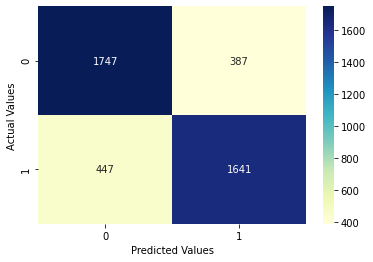

Precision:  0.8091715976331361
Recall:  0.7859195402298851
F1-score:  0.7973760932944607


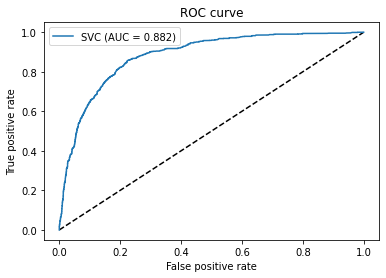

In [ ]:
svc_classifier = SVC(probability=True)
svc_classifier.fit(X_train,Y_train)
Y_pred_svc = svc_classifier.predict(X_test)
Y_pred_svc_prob = svc_classifier.predict_proba(X_test)

confusion_matrix = pd.crosstab(Y_test, Y_pred_svc, rownames=['Actual Values'], colnames=['Predicted Values'])
sb.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

print('Precision: ',metrics.precision_score(Y_test, Y_pred_svc))
print('Recall: ',metrics.recall_score(Y_test, Y_pred_svc))
print('F1-score: ',metrics.f1_score(Y_test, Y_pred_svc))


fpr_svc, tpr_svc, thresholds_svc = roc_curve(Y_test, Y_pred_svc_prob[:,1])
auc_svc = auc(fpr_svc, tpr_svc)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svc, tpr_svc, label='SVC (AUC = {:.3f})'.format(auc_svc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Random Forest

In [ ]:
target='Death'
X = data_oversampled[['OASIS_score','Apache3_score','SOFA_score','Blood_presure','BMI','Heart_rate']]
Y = data_oversampled[target]
X,Y = shuffle(X,Y)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=12)

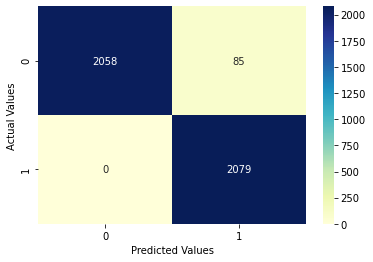

Precision:  0.960720887245841
Recall:  1.0
F1-score:  0.9799670044779637


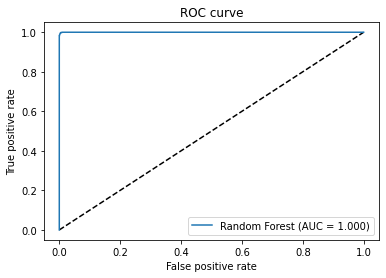

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,Y_train)
Y_pred_forest = random_forest_classifier.predict(X_test)
Y_pred_forest_prob = random_forest_classifier.predict_proba(X_test)

confusion_matrix = pd.crosstab(Y_test, Y_pred_forest, rownames=['Actual Values'], colnames=['Predicted Values'])
sb.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

print('Precision: ',metrics.precision_score(Y_test, Y_pred_forest))
print('Recall: ',metrics.recall_score(Y_test, Y_pred_forest))
print('F1-score: ',metrics.f1_score(Y_test, Y_pred_forest))


fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_test, Y_pred_forest_prob[:,1])
auc_forest = auc(fpr_forest, tpr_forest)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_forest, tpr_forest, label='Random Forest (AUC = {:.3f})'.format(auc_forest))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


# Regression

In [ ]:
data

,Death,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Respiration_rate,Diastolic,Glasgow_coma_scale,Ventilation,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
0,0,54,1,29.681633,41,105.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,0.0,0.0,13.0,63.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,3.46,3.0,15
1,0,65,0,18.744796,42,125.0,85.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,17.0,70.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.96,1.0,12
2,0,54,1,21.913580,24,188.0,71.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,10.0,101.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,8.57,1.0,15
4,0,50,1,22.446126,65,96.0,70.0,85.0,0.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,3.0,20.0,87.0,15.0,0,1,0,0,0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,4.81,7.0,31
5,0,55,1,30.267643,41,166.0,77.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,22.0,54.0,3.0,1,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,5.67,6.0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224,1,72,0,32.656250,65,80.0,70.0,97.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,20.0,102.0,15.0,0,0,0,0,1,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0,6.76,3.0,28
9225,1,65,0,25.383707,71,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,3.0,16.0,45.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55,5.0,31
9226,1,66,1,22.305471,180,94.0,120.0,75.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,0.0,4,2.0,0.0,4.0,4.0,1.0,27.0,55.0,3.0,1,0,0,0,1,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,2.30,15.0,49
9227,0,56,1,24.772097,89,134.0,108.0,95.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3,0.0,0.0,4.0,0.0,1.0,17.0,62.0,3.0,0,0,0,1,1,0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,21.16,8.0,49


In [ ]:
# getting regression data from the main dataset
regression_data = data[data['Death']==1]
regression_data = regression_data.drop('Death',axis=1)
regression_data

,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Respiration_rate,Diastolic,Glasgow_coma_scale,Ventilation,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
84,68,1,30.393890,72,108.0,67.0,93.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,2,0.0,2.0,1.0,0.0,3.0,29.0,59.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.53,8.0,16
101,87,0,27.813945,50,110.0,82.0,99.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,1.0,0,0.0,0.0,1.0,1.0,0.0,26.0,73.0,14.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,7.19,2.0,19
123,80,1,29.531111,84,145.0,60.0,97.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0,3.0,15.0,50.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,22.21,4.0,36
178,93,1,29.860551,177,59.0,39.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,4.0,4.0,4.0,12.0,52.0,3.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.43,16.0,51
366,32,0,24.943311,85,138.0,117.0,95.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,3.0,43.0,62.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.67,6.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9220,86,1,32.234931,188,145.0,53.0,82.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,4,1.0,0.0,4.0,4.0,3.0,23.0,114.0,10.0,1,0,0,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,0,0.79,16.0,58
9222,82,1,24.491296,61,112.0,65.0,98.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,1,0.0,0.0,1.0,0.0,0.0,24.0,50.0,15.0,0,0,0,0,0,1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,26.98,2.0,23
9224,72,0,32.656250,65,80.0,70.0,97.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,20.0,102.0,15.0,0,0,0,0,1,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0,6.76,3.0,28
9225,65,0,25.383707,71,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,3.0,16.0,45.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55,5.0,31


In [ ]:
regression_data.describe()

,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Respiration_rate,Diastolic,Glasgow_coma_scale,Ventilation,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,72.163804,0.606341,29.969141,97.178336,113.929987,89.463672,92.812417,0.232497,0.286658,0.175694,0.594452,3.319683,0.344782,0.280053,0.260238,2.186262,0.521797,0.280053,2.204756,1.310436,1.705416,20.784280,64.564069,10.286658,0.480845,0.121532,0.103038,0.166446,0.126816,0.249670,0.299868,0.138705,0.512550,0.396301,0.336856,0.365918,0.500661,0.381770,0.216645,8.283791,9.356671,38.915456
std,13.800721,0.488884,7.904449,33.294559,27.935046,23.116231,10.254394,0.422703,0.452499,0.380811,0.914678,2.984226,0.475611,0.449322,0.439054,1.530439,0.848973,0.718822,1.333960,1.648331,1.371144,6.325992,18.911453,5.171758,0.499963,0.326961,0.304210,0.372727,0.332987,0.433108,0.458503,0.345867,0.500173,0.489452,0.472948,0.482005,0.500330,0.486142,0.412231,18.954284,4.174389,11.349929
min,21.000000,0.000000,12.745487,24.000000,50.000000,21.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,21.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,8.000000
25%,64.000000,0.000000,24.489796,73.000000,94.000000,74.000000,91.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,16.000000,51.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270000,6.000000,30.000000
50%,74.000000,1.000000,28.534698,92.000000,110.000000,89.000000,96.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,20.000000,62.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.310000,9.000000,39.000000
75%,83.000000,1.000000,33.912274,115.000000,130.000000,103.000000,99.000000,0.000000,1.000000,0.000000,2.000000,5.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,4.000000,3.000000,3.000000,24.000000,75.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,8.440000,12.000000,48.000000
max,100.000000,1.000000,75.311634,200.000000,232.000000,235.000000,100.000000,1.000000,1.000000,1.000000,2.000000,16.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,48.000000,139.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,265.330000,21.000000,64.000000


In [ ]:
regression_data[(regression_data['days']<1)]

,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Respiration_rate,Diastolic,Glasgow_coma_scale,Ventilation,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
84,68,1,30.393890,72,108.0,67.0,93.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,2,0.0,2.0,1.0,0.0,3.0,29.0,59.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.53,8.0,16
178,93,1,29.860551,177,59.0,39.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,4.0,4.0,4.0,12.0,52.0,3.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.43,16.0,51
366,32,0,24.943311,85,138.0,117.0,95.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,3.0,43.0,62.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.67,6.0,31
465,71,1,25.092799,44,82.0,68.0,92.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0,0.0,30.0,81.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0.23,1.0,25
815,74,1,31.673469,135,141.0,84.0,99.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0,3,3.0,0.0,1.0,3.0,2.0,20.0,68.0,15.0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.91,12.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9146,57,1,34.114237,148,143.0,97.0,78.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,4,0.0,0.0,4.0,4.0,1.0,24.0,101.0,3.0,1,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0,0.21,13.0,50
9209,82,0,28.749626,138,98.0,42.0,94.0,0.0,1.0,0.0,0.0,5.0,1.0,1.0,1.0,3,4.0,1.0,4.0,0.0,4.0,22.0,89.0,8.0,1,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,0.92,16.0,48
9210,49,1,31.555880,166,204.0,110.0,53.0,1.0,0.0,0.0,0.0,5.0,1.0,0.0,1.0,4,0.0,1.0,4.0,4.0,2.0,20.0,111.0,3.0,1,0,1,0,0,0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,1,0.77,15.0,52
9212,73,0,49.951931,166,95.0,105.0,94.0,0.0,1.0,0.0,0.0,5.0,1.0,1.0,0.0,4,0.0,2.0,4.0,4.0,1.0,27.0,31.0,5.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0.72,15.0,48


In [ ]:
#converteed to 1 day for days less than 1
regression_data.days = regression_data.days.apply(lambda x: 1 if x<1 else x)

In [ ]:
regression_data.describe()

,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Respiration_rate,Diastolic,Glasgow_coma_scale,Ventilation,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,72.163804,0.606341,29.969141,97.178336,113.929987,89.463672,92.812417,0.232497,0.286658,0.175694,0.594452,3.319683,0.344782,0.280053,0.260238,2.186262,0.521797,0.280053,2.204756,1.310436,1.705416,20.784280,64.564069,10.286658,0.480845,0.121532,0.103038,0.166446,0.126816,0.249670,0.299868,0.138705,0.512550,0.396301,0.336856,0.365918,0.500661,0.381770,0.216645,8.391651,9.356671,38.915456
std,13.800721,0.488884,7.904449,33.294559,27.935046,23.116231,10.254394,0.422703,0.452499,0.380811,0.914678,2.984226,0.475611,0.449322,0.439054,1.530439,0.848973,0.718822,1.333960,1.648331,1.371144,6.325992,18.911453,5.171758,0.499963,0.326961,0.304210,0.372727,0.332987,0.433108,0.458503,0.345867,0.500173,0.489452,0.472948,0.482005,0.500330,0.486142,0.412231,18.910567,4.174389,11.349929
min,21.000000,0.000000,12.745487,24.000000,50.000000,21.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,21.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000
25%,64.000000,0.000000,24.489796,73.000000,94.000000,74.000000,91.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,16.000000,51.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270000,6.000000,30.000000
50%,74.000000,1.000000,28.534698,92.000000,110.000000,89.000000,96.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,20.000000,62.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.310000,9.000000,39.000000
75%,83.000000,1.000000,33.912274,115.000000,130.000000,103.000000,99.000000,0.000000,1.000000,0.000000,2.000000,5.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,4.000000,3.000000,3.000000,24.000000,75.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,8.440000,12.000000,48.000000
max,100.000000,1.000000,75.311634,200.000000,232.000000,235.000000,100.000000,1.000000,1.000000,1.000000,2.000000,16.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,48.000000,139.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,265.330000,21.000000,64.000000


[]


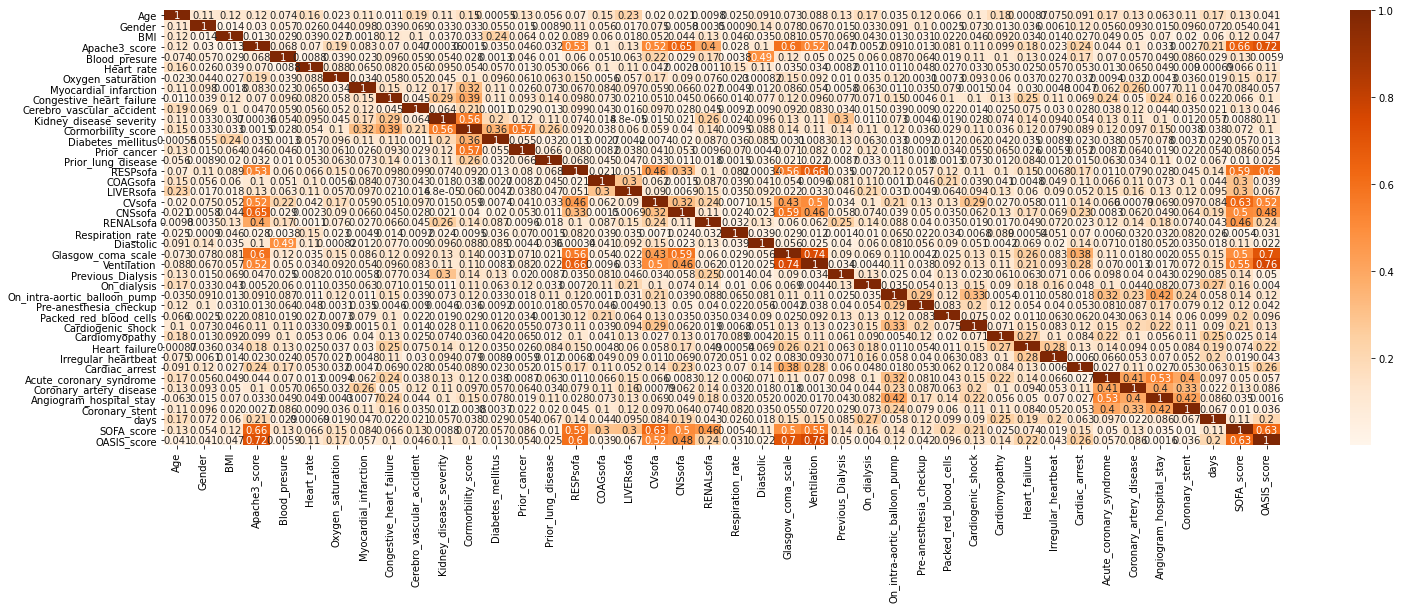

In [ ]:
#regression_data = regression_data.drop(['RESPsofa','COAGsofa','LIVERsofa','CVsofa','CNSsofa','RENALsofa'],axis=1)
#finding corelation coefficient by pearson's correlation
corr_matrix = regression_data.corr().abs()
plt.figure(figsize=(25, 8))
sb.heatmap(corr_matrix, annot=True, cmap='Oranges')

#selecting upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#getting columns if it has greater than 0.8 corelation coefficiant
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)

count    757.000000
mean       8.391651
std       18.910567
min        1.000000
25%        1.270000
50%        3.310000
75%        8.440000
max      265.330000
Name: days, dtype: float64

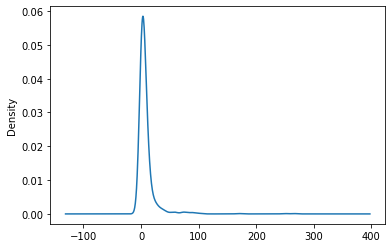

In [ ]:
regression_data['days'].plot(kind='kde')
regression_data['days'].describe()

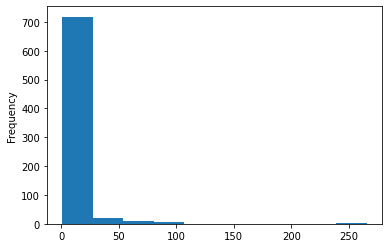

In [ ]:
regression_data['days'].plot(kind='hist')

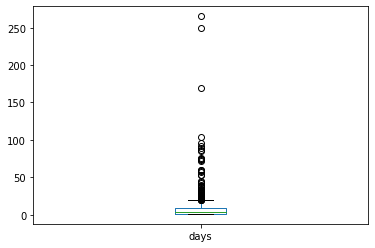

In [ ]:
regression_data['days'].plot(kind='box')

In [ ]:
regression_data = regression_data[(regression_data.days < 150)]

In [ ]:
regression_data

,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Respiration_rate,Diastolic,Glasgow_coma_scale,Ventilation,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
84,68,1,30.393890,72,108.0,67.0,93.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,2,0.0,2.0,1.0,0.0,3.0,29.0,59.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1.00,8.0,16
101,87,0,27.813945,50,110.0,82.0,99.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,1.0,0,0.0,0.0,1.0,1.0,0.0,26.0,73.0,14.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,7.19,2.0,19
123,80,1,29.531111,84,145.0,60.0,97.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0,3.0,15.0,50.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,22.21,4.0,36
178,93,1,29.860551,177,59.0,39.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,4.0,4.0,4.0,12.0,52.0,3.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00,16.0,51
366,32,0,24.943311,85,138.0,117.0,95.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,3.0,43.0,62.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00,6.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9220,86,1,32.234931,188,145.0,53.0,82.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,4,1.0,0.0,4.0,4.0,3.0,23.0,114.0,10.0,1,0,0,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,0,1.00,16.0,58
9222,82,1,24.491296,61,112.0,65.0,98.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,1,0.0,0.0,1.0,0.0,0.0,24.0,50.0,15.0,0,0,0,0,0,1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,26.98,2.0,23
9224,72,0,32.656250,65,80.0,70.0,97.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,20.0,102.0,15.0,0,0,0,0,1,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0,6.76,3.0,28
9225,65,0,25.383707,71,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,3.0,16.0,45.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55,5.0,31


Min-Max Normalization

In [ ]:
numeric_data

,Age,BMI,Blood_presure,Heart_rate,Oxygen_saturation,Respiration_rate,Diastolic,Apache3_score,OASIS_score
0,54,29.681633,105.0,49.0,99.0,13.0,63.0,41,15
1,65,18.744796,125.0,85.0,98.0,17.0,70.0,42,12
2,54,21.913580,188.0,71.0,98.0,10.0,101.0,24,15
3,59,0.000000,110.0,82.0,99.0,19.0,56.0,34,23
4,50,22.446126,96.0,70.0,85.0,20.0,87.0,65,31
...,...,...,...,...,...,...,...,...,...
9224,72,32.656250,80.0,70.0,97.0,20.0,102.0,65,28
9225,65,25.383707,126.0,90.0,97.0,16.0,45.0,71,31
9226,66,22.305471,94.0,120.0,75.0,27.0,55.0,180,49
9227,56,24.772097,134.0,108.0,95.0,17.0,62.0,89,49


In [ ]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(regression_data[['Age','BMI','Blood_presure','Heart_rate','Oxygen_saturation','Respiration_rate','Diastolic','Apache3_score','OASIS_score']])
normalized_data

array([[0.59493671, 0.28207591, 0.31868132, ..., 0.3220339 , 0.27272727,
        0.14285714],
       [0.83544304, 0.24084042, 0.32967033, ..., 0.44067797, 0.14772727,
        0.19642857],
       [0.74683544, 0.26828603, 0.52197802, ..., 0.24576271, 0.34090909,
        0.5       ],
       ...,
       [0.64556962, 0.3182354 , 0.16483516, ..., 0.68644068, 0.23295455,
        0.35714286],
       [0.55696203, 0.20199774, 0.41758242, ..., 0.20338983, 0.26704545,
        0.41071429],
       [0.56962025, 0.15279802, 0.24175824, ..., 0.28813559, 0.88636364,
        0.73214286]])

In [ ]:
normalized_data = pd.DataFrame(normalized_data, columns=['Age','BMI','Blood_presure','Heart_rate','Oxygen_saturation','Respiration_rate','Diastolic','Apache3_score','OASIS_score'])

In [ ]:
normalized_data

,Age,BMI,Blood_presure,Heart_rate,Oxygen_saturation,Respiration_rate,Diastolic,Apache3_score,OASIS_score
0,0.594937,0.282076,0.318681,0.214953,0.915663,0.558140,0.322034,0.272727,0.142857
1,0.835443,0.240840,0.329670,0.285047,0.987952,0.488372,0.440678,0.147727,0.196429
2,0.746835,0.268286,0.521978,0.182243,0.963855,0.232558,0.245763,0.340909,0.500000
3,0.911392,0.273552,0.049451,0.084112,0.710843,0.162791,0.262712,0.869318,0.767857
4,0.139241,0.194959,0.483516,0.448598,0.939759,0.883721,0.347458,0.346591,0.410714
...,...,...,...,...,...,...,...,...,...
749,0.822785,0.311501,0.521978,0.149533,0.783133,0.418605,0.788136,0.931818,0.892857
750,0.772152,0.187734,0.340659,0.205607,0.975904,0.441860,0.245763,0.210227,0.267857
751,0.645570,0.318235,0.164835,0.228972,0.963855,0.348837,0.686441,0.232955,0.357143
752,0.556962,0.201998,0.417582,0.322430,0.963855,0.255814,0.203390,0.267045,0.410714


In [ ]:
regression_data = regression_data.reset_index(drop=True)

In [ ]:
regression_data

,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Respiration_rate,Diastolic,Glasgow_coma_scale,Ventilation,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
0,68,1,30.393890,72,108.0,67.0,93.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,2,0.0,2.0,1.0,0.0,3.0,29.0,59.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1.00,8.0,16
1,87,0,27.813945,50,110.0,82.0,99.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,1.0,0,0.0,0.0,1.0,1.0,0.0,26.0,73.0,14.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,7.19,2.0,19
2,80,1,29.531111,84,145.0,60.0,97.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0,3.0,15.0,50.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,22.21,4.0,36
3,93,1,29.860551,177,59.0,39.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,4.0,4.0,4.0,12.0,52.0,3.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00,16.0,51
4,32,0,24.943311,85,138.0,117.0,95.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,3.0,43.0,62.0,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00,6.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,86,1,32.234931,188,145.0,53.0,82.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,4,1.0,0.0,4.0,4.0,3.0,23.0,114.0,10.0,1,0,0,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,0,1.00,16.0,58
750,82,1,24.491296,61,112.0,65.0,98.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,1,0.0,0.0,1.0,0.0,0.0,24.0,50.0,15.0,0,0,0,0,0,1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,26.98,2.0,23
751,72,0,32.656250,65,80.0,70.0,97.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,20.0,102.0,15.0,0,0,0,0,1,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0,6.76,3.0,28
752,65,0,25.383707,71,126.0,90.0,97.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,3.0,16.0,45.0,15.0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55,5.0,31


In [ ]:
for column in ['Age','BMI','Blood_presure','Heart_rate','Oxygen_saturation','Respiration_rate','Diastolic','Apache3_score','OASIS_score']:
  regression_data[column] = normalized_data[column]

In [ ]:
regression_data

,Age,Gender,BMI,Apache3_score,Blood_presure,Heart_rate,Oxygen_saturation,Myocardial_infarction,Congestive_heart_failure,Cerebro_vascular_accident,Kidney_disease_severity,Cormorbility_score,Diabetes_mellitus,Prior_cancer,Prior_lung_disease,RESPsofa,COAGsofa,LIVERsofa,CVsofa,CNSsofa,RENALsofa,Respiration_rate,Diastolic,Glasgow_coma_scale,Ventilation,Previous_Dialysis,On_dialysis,On_intra-aortic_balloon_pump,Pre-anesthesia_checkup,Packed_red_blood_cells,Cardiogenic_shock,Cardiomyopathy,Heart_failure,Irregular_heartbeat,Cardiac_arrest,Acute_coronary_syndrome,Coronary_artery_disease,Angiogram_hospital_stay,Coronary_stent,days,SOFA_score,OASIS_score
0,0.594937,1,0.282076,0.272727,0.318681,0.214953,0.915663,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,2,0.0,2.0,1.0,0.0,3.0,0.558140,0.322034,15.0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1.00,8.0,0.142857
1,0.835443,0,0.240840,0.147727,0.329670,0.285047,0.987952,0.0,0.0,1.0,0.0,4.0,0.0,1.0,1.0,0,0.0,0.0,1.0,1.0,0.0,0.488372,0.440678,14.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,7.19,2.0,0.196429
2,0.746835,1,0.268286,0.340909,0.521978,0.182243,0.963855,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0,3.0,0.232558,0.245763,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,22.21,4.0,0.500000
3,0.911392,1,0.273552,0.869318,0.049451,0.084112,0.710843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,4.0,4.0,4.0,0.162791,0.262712,3.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00,16.0,0.767857
4,0.139241,0,0.194959,0.346591,0.483516,0.448598,0.939759,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,3.0,0.883721,0.347458,15.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00,6.0,0.410714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0.822785,1,0.311501,0.931818,0.521978,0.149533,0.783133,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,4,1.0,0.0,4.0,4.0,3.0,0.418605,0.788136,10.0,1,0,0,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,0,1.00,16.0,0.892857
750,0.772152,1,0.187734,0.210227,0.340659,0.205607,0.975904,0.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,1,0.0,0.0,1.0,0.0,0.0,0.441860,0.245763,15.0,0,0,0,0,0,1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,26.98,2.0,0.267857
751,0.645570,0,0.318235,0.232955,0.164835,0.228972,0.963855,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.348837,0.686441,15.0,0,0,0,0,1,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0,6.76,3.0,0.357143
752,0.556962,0,0.201998,0.267045,0.417582,0.322430,0.963855,0.0,1.0,0.0,0.0,9.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,3.0,0.255814,0.203390,15.0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,8.55,5.0,0.410714


Export Dataset ready for regression

In [ ]:
regression_data.to_csv('sofa_regression.csv', index=False)

# Splitting data for Regression

In [ ]:
target='days'
X = regression_data.drop([target],axis=1)
Y = regression_data[target]
X,Y = shuffle(X,Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=12)

In [ ]:
X.shape

(754, 41)

In [ ]:
Y.shape

(754,)

In [ ]:
mae_scores = {}
mse_scores = {}
r2_scores = {}

# Regression

Linear Regression

Mean Absolute Error : 6.166090190279644
Mean SquaredError : 100.40044329110692
r2 score : 0.21536502440129512


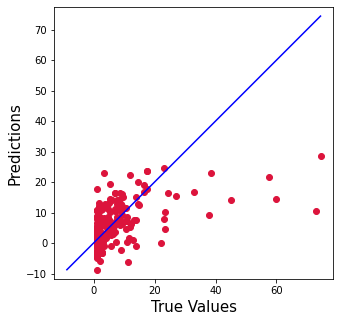

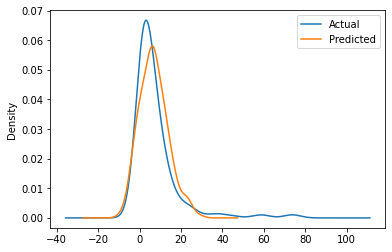

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,Y_train)
Y_pred = np.array(linear_regression.predict(X_test))

print('Mean Absolute Error :',mean_absolute_error(Y_test,Y_pred))
print('Mean SquaredError :',mean_squared_error(Y_test,Y_pred))
print('r2 score :',r2_score(Y_test,Y_pred))


plt.figure(figsize=(5,5))
plt.scatter(Y_test, Y_pred, c='crimson')

p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

pd.DataFrame({'Actual': np.array(Y_test),'Predicted':np.array(Y_pred)}).plot(kind='kde')

mae_scores['linear'] = mean_absolute_error(Y_test,Y_pred)
mse_scores['linear'] = mean_squared_error(Y_test,Y_pred)
r2_scores['linear'] = r2_score(Y_test,Y_pred)

SVM

Mean Absolute Error : 5.54483126858985
Mean SquaredError : 138.91016900735167
r2 score : -0.08559059598444607


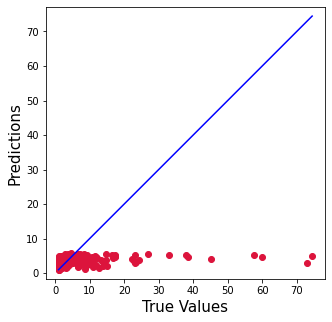

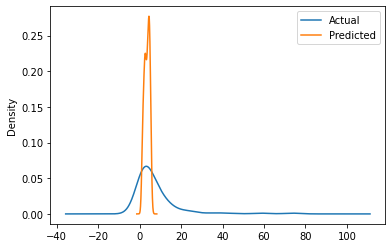

In [ ]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

print('Mean Absolute Error :',mean_absolute_error(Y_test,Y_pred))
print('Mean SquaredError :',mean_squared_error(Y_test,Y_pred))
print('r2 score :',r2_score(Y_test,Y_pred))

plt.figure(figsize=(5,5))
plt.scatter(Y_test, Y_pred, c='crimson')

p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

pd.DataFrame({'Actual': np.array(Y_test),'Predicted':np.array(Y_pred)}).plot(kind='kde')

mae_scores['svm'] = mean_absolute_error(Y_test,Y_pred)
mse_scores['svm'] = mean_squared_error(Y_test,Y_pred)
r2_scores['svm'] = r2_score(Y_test,Y_pred)

Decision Tree Regressor

Mean Absolute Error : 7.3024867724867715
Mean SquaredError : 221.35524814814815
r2 score : -0.7299034151251766


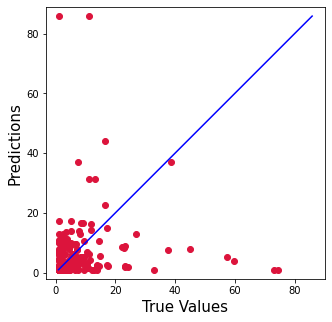

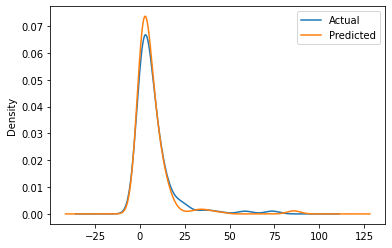

In [ ]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print('Mean Absolute Error :',mean_absolute_error(Y_test,Y_pred))
print('Mean SquaredError :',mean_squared_error(Y_test,Y_pred))
print('r2 score :',r2_score(Y_test,Y_pred))

plt.figure(figsize=(5,5))
plt.scatter(Y_test, Y_pred, c='crimson')

p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

pd.DataFrame({'Actual': np.array(Y_test),'Predicted':np.array(Y_pred)}).plot(kind='kde')

mae_scores['decision'] = mean_absolute_error(Y_test,Y_pred)
mse_scores['decision'] = mean_squared_error(Y_test,Y_pred)
r2_scores['decision'] = r2_score(Y_test,Y_pred)

Gradient Boosting

Mean Absolute Error : 6.27104559558561
Mean Squared Error : 123.7848721134974
r2 score : 0.032614429513521226


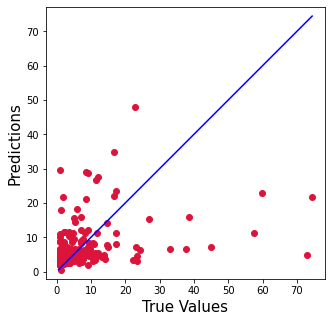

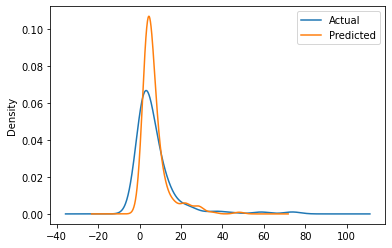

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 350,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

print('Mean Absolute Error :',mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error :',mean_squared_error(Y_test,Y_pred))
print('r2 score :',r2_score(Y_test,Y_pred))

plt.figure(figsize=(5,5))
plt.scatter(Y_test, Y_pred, c='crimson')

p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

pd.DataFrame({'Actual': np.array(Y_test),'Predicted':np.array(Y_pred)}).plot(kind='kde')

mae_scores['gradient'] = mean_absolute_error(Y_test,Y_pred)
mse_scores['gradient'] = mean_squared_error(Y_test,Y_pred)
r2_scores['gradient'] = r2_score(Y_test,Y_pred)

Random Forest Regressor

Mean Absolute Error : 6.931858201058201
Mean SquaredError : 137.2846832087831
r2 score : -0.07288733524088675


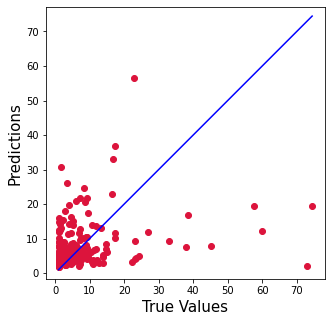

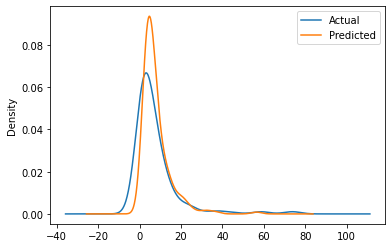

In [ ]:

rf_regr = RandomForestRegressor().fit(X_train, Y_train)
Y_pred = rf_regr.predict(X_test)

print('Mean Absolute Error :',mean_absolute_error(Y_test,Y_pred))
print('Mean SquaredError :',mean_squared_error(Y_test,Y_pred))
print('r2 score :',r2_score(Y_test,Y_pred))


plt.figure(figsize=(5,5))
plt.scatter(Y_test, Y_pred, c='crimson')

p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

pd.DataFrame({'Actual': np.array(Y_test),'Predicted':np.array(Y_pred)}).plot(kind='kde')

mae_scores['random'] = mean_absolute_error(Y_test,Y_pred)
mse_scores['random'] = mean_squared_error(Y_test,Y_pred)
r2_scores['random'] = r2_score(Y_test,Y_pred)

Neural Network

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=41, activation='relu', kernel_initializer='normal'))
model.add(Dense(10, kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mae', optimizer='adam' ,metrics=['mse','mean_absolute_error'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                1260      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,581
Trainable params: 1,581
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=1000 )

Epoch 1/500
1/1 [==============================] - 0s 482ms/step - loss: 7.4852 - mse: 225.3356 - mean_absolute_error: 7.4852
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 7.4784 - mse: 225.2272 - mean_absolute_error: 7.4784
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 7.4716 - mse: 225.1189 - mean_absolute_error: 7.4716
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 7.4648 - mse: 225.0102 - mean_absolute_error: 7.4648
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 7.4579 - mse: 224.9004 - mean_absolute_error: 7.4579
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 7.4508 - mse: 224.7886 - mean_absolute_error: 7.4508
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 7.4435 - mse: 224.6736 - mean_absolute_error: 7.4435
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 7.4359 - mse: 224.5542 - mean_absolute_error: 7.4359
Epoch

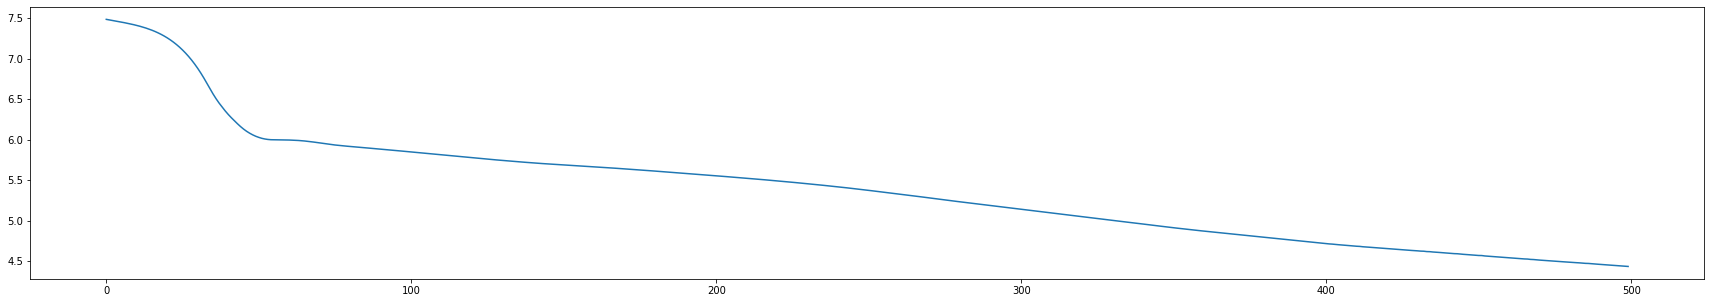

In [ ]:
from matplotlib import pyplot

pyplot.figure(figsize=(30, 5))
pyplot.plot(history.history['mean_absolute_error'])
pyplot.show()

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred.reshape(len(Y_pred))
Y_pred

array([13.541339  ,  1.2217488 ,  8.794789  ,  2.7303514 ,  1.8190483 ,
        1.3271507 ,  5.019053  ,  0.06772304,  1.7738457 ,  2.6829476 ,
        5.7504644 ,  8.653676  ,  6.5409455 ,  5.7485423 ,  2.693981  ,
        1.1835533 ,  3.6618013 , 12.396742  , 13.737729  ,  1.289669  ,
        2.8556743 ,  1.9933834 ,  2.2313306 ,  4.214522  ,  2.8795576 ,
       12.959667  ,  1.0973955 ,  4.0941534 ,  9.366761  ,  3.6175904 ,
        3.069682  ,  4.801094  ,  3.6223087 ,  1.6713716 , 10.645788  ,
       11.072051  ,  4.5754347 ,  5.6379676 ,  8.434907  ,  1.0739825 ,
        2.462846  , 10.718208  ,  0.42631876,  1.8214082 ,  2.2262998 ,
       11.023813  ,  3.9932625 ,  4.7111998 ,  5.0971565 ,  1.3634182 ,
        1.557103  ,  1.2790712 ,  4.7885866 ,  1.264203  ,  1.1650293 ,
        7.6883945 ,  3.5486991 ,  1.425761  ,  2.350589  ,  2.4835606 ,
        1.6312618 ,  2.3889773 ,  9.081     ,  3.2475514 ,  4.6336246 ,
        1.6116883 ,  1.2719729 ,  1.4927802 ,  2.4468453 ,  1.62

In [ ]:
d = {'Actual' : np.array(Y_test), 'Predicted':Y_pred}
output = pd.DataFrame(d)

In [ ]:
output

,Actual,Predicted
0,5.33,13.541339
1,1.00,1.221749
2,9.11,8.794789
3,1.00,2.730351
4,4.57,1.819048
...,...,...
184,1.89,2.250476
185,7.90,10.644221
186,1.00,4.432497
187,1.00,1.500139


In [ ]:

print('Mean Absolute Error :',mean_absolute_error(Y_test,Y_pred))
print('Mean SquaredError :',mean_squared_error(Y_test,Y_pred))
print('r2 score :',r2_score(Y_test,Y_pred))

mae_scores['neural'] = mean_absolute_error(Y_test,Y_pred)
mse_scores['neural'] = mean_squared_error(Y_test,Y_pred)
r2_scores['neural'] = r2_score(Y_test,Y_pred)

Mean Absolute Error : 5.071096582866851
Mean SquaredError : 107.70953976290448
r2 score : 0.1582440342561705


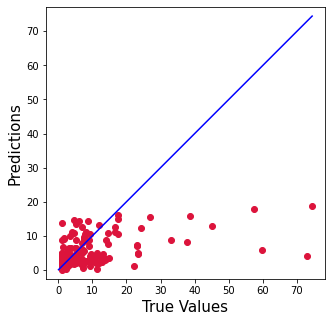

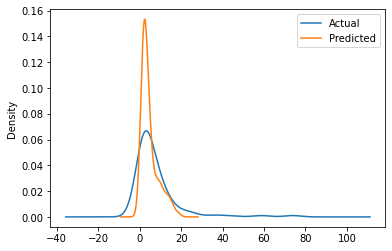

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(Y_test, Y_pred, c='crimson')

p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

pd.DataFrame({'Actual': np.array(Y_test),'Predicted':np.array(Y_pred)}).plot(kind='kde')


In [ ]:
print('mae scores : ',mae_scores)
print('mse scores : ',mse_scores)
print('r2 scores : ',r2_scores)

mae scores :  {'linear': 6.166090190279644, 'svm': 5.54483126858985, 'decision': 7.3024867724867715, 'gradient': 6.27104559558561, 'random': 6.931858201058201, 'neural': 5.071096582866851}
mse scores :  {'linear': 100.40044329110692, 'svm': 138.91016900735167, 'decision': 221.35524814814815, 'gradient': 123.7848721134974, 'random': 137.2846832087831, 'neural': 107.70953976290448}
r2 scores :  {'linear': 0.21536502440129512, 'svm': -0.08559059598444607, 'decision': -0.7299034151251766, 'gradient': 0.032614429513521226, 'random': -0.07288733524088675, 'neural': 0.1582440342561705}


In [ ]:
model_names = ['linear Regression','Decision Tree','Random Forest','Gradient Boosting','SVM','Neural Network']
Mae_scores_list = [round(mae_scores['linear'],2),round(mae_scores['decision'],2),round(mae_scores['random'],2),round(mae_scores['gradient'],2),round(mae_scores['svm'],2),round(mae_scores['neural'],2)]
Mse_scores_list = [round(mse_scores['linear'],2),round(mse_scores['decision'],2),round(mse_scores['random'],2),round(mse_scores['gradient'],2),round(mse_scores['svm'],2),round(mse_scores['neural'],2)]
r2_scores_list = [round(r2_scores['linear'],2),round(r2_scores['decision'],2),round(r2_scores['random'],2),round(r2_scores['gradient'],2),round(r2_scores['svm'],2),round(r2_scores['neural'],2)]

In [ ]:
scores = pd.DataFrame(np.array([model_names, Mae_scores_list, Mse_scores_list, r2_scores_list])).transpose().rename(columns={0:'Models',1:'MAE',2:'MSE',3:'r2 score'})

In [ ]:
scores

,Models,MAE,MSE,r2 score
0,linear Regression,6.17,100.4,0.22
1,Decision Tree,7.3,221.36,-0.73
2,Random Forest,6.93,137.28,-0.07
3,Gradient Boosting,6.27,123.78,0.03
4,SVM,5.54,138.91,-0.09
5,Neural Network,5.07,107.71,0.16


# Generate Pickle File

In [ ]:
pickle.dump(random_forest_classifier, open('sofa_classification.pkl', 'wb'))
pickle.dump(scaler, open('sofa_scaler.pkl', 'wb'))
model.save("sofa_regression.hdf5")

In [ ]:
#splitting data
target='Death'
X = data_undersampled.drop([target,'days'],axis=1)
Y = data_undersampled[target]
X,Y = shuffle(X,Y)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=12)

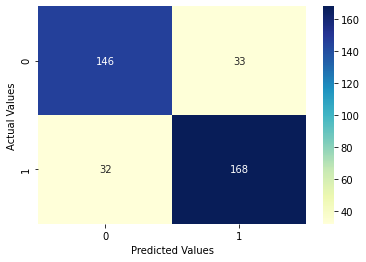

Precision:  0.835820895522388
Recall:  0.84
F1-score:  0.8379052369077306


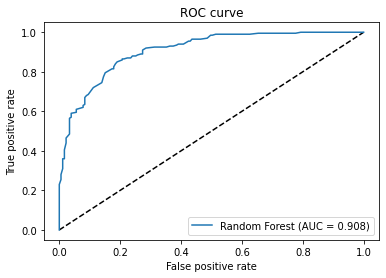

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,Y_train)
Y_pred_forest = random_forest_classifier.predict(X_test)
Y_pred_forest_prob = random_forest_classifier.predict_proba(X_test)

confusion_matrix = pd.crosstab(Y_test, Y_pred_forest, rownames=['Actual Values'], colnames=['Predicted Values'])
sb.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

print('Precision: ',metrics.precision_score(Y_test, Y_pred_forest))
print('Recall: ',metrics.recall_score(Y_test, Y_pred_forest))
print('F1-score: ',metrics.f1_score(Y_test, Y_pred_forest))


fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_test, Y_pred_forest_prob[:,1])
auc_forest = auc(fpr_forest, tpr_forest)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_forest, tpr_forest, label='Random Forest (AUC = {:.3f})'.format(auc_forest))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

p_scores['random'] = metrics.precision_score(Y_test, Y_pred_forest)
r_scores['random'] = metrics.recall_score(Y_test, Y_pred_forest)
f1_scores['random'] = metrics.f1_score(Y_test, Y_pred_forest)